## Aviation Accident Risk Analysis: Data-Driven Recommendations for Safer Investments
This project explores historical aviation accident data to identify patterns, contributing factors, and risk profiles associated with various aircraft models, flight conditions, and operational phases. By integrating accident records with regulatory data, weather conditions, and aircraft registration details, I aim to uncover actionable insights that support strategic decision-making—particularly for stakeholders assessing aircraft safety before investment or deployment.

Through a combination of statistical techniques and visual analytics, this analysis reveals key trends spanning decades of incidents. The ultimate goal: to deliver **at least three concrete, data-backed business recommendations** that enhance aviation safety and reduce investment risk for operators, insurers, and aviation decision-makers.

## Guiding Questions for Analysis

To shape meaningful business recommendations and uncover the underlying factors contributing to aviation accidents, the following key questions will guide me in my analysis:

1. **Which aircraft models are associated with the highest and lowest accident rates, and how do these rates compare when normalized by fleet size or registration volume?**  
   *→ Informs investment risk by identifying safer aircraft models.*

2. **What role do weather conditions play in aviation accidents, and which specific weather types are most frequently linked to severe outcomes?**  
   *→ Supports operational planning and risk mitigation under adverse weather.*

3. **Are there identifiable trends in accidents across different phases of flight (e.g., takeoff, cruise, landing), and do these vary by aircraft type or operator category?**  
   *→ Guides targeted safety interventions at high-risk phases.*

4. **To what extent do regulatory or maintenance-related issues contribute to accident frequency or severity?**  
   *→ Informs policy adjustments and helps rank compliance risk across aircraft categories.*

5. **Have accident patterns shifted over time, and what does this reveal about the effectiveness of safety regulations or technological advancements?**  
   *→ Tracks progress and identifies areas needing continued focus.*

6. **Are there regional or geographical patterns in accident occurrence, especially in relation to weather or regulation enforcement?**  
   *→ Offers strategic insight for operators expanding into new territories.*

## PHASE ONE:  Data Understanding

In this section, i will dive into a comprehensive examination of all datasets i will use in the project. The goal is to assess their structure, contents, and quality — and begin identifying how they can be integrated to support meaningful analysis and actionable insights.

---

###  Objectives

- Understand the schema, variables, and value distributions in each dataset.
- Assess data quality: missing values, inconsistencies, encoding issues.
- Identify relationships and join keys across datasets.
- Define preprocessing needs for each dataset.

---

###  Approach

#### 1. **Main Exploration (Aviation DAta)**
- Load the aviation accident dataset.
- Inspect variable types and value ranges.
- Identify missing or inconsistent values.
- Explore time, location, aircraft model, and severity distributions.

#### 2. **Explore Supplementary Data**
- Review each FAA data:
  - Are the values well-formatted?
  - Any obvious missing or invalid entries?
  - What columns are useful?

#### 3. **Plan for Dataset Integration**
- Identify common keys for joining:
  - `Registration.Number` ↔ `N-Number` (FAA)
  - `Model` ↔ `MODEL` (FAA)
  - Date + Lat/Lon proximity ↔ GHCND Weather
- Consider transformations (e.g., date parsing, coordinate matching).

---



In [1]:
#importing standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

## PART ONE: Core Data Set Understanding
The primary dataset for this project consists of detailed records of aviation accidents, capturing various attributes such as accident number, date, aircraft model, flight phase, location, injury severity, and more. This dataset serves as the backbone of my analysis and will help me uncover core patterns in accident frequency, severity, and causes.

Before diving into analysis, i will begin by examining the structure and content of this dataset to understand its variables, detect missing or inconsistent data, and identify potential areas for transformation. This step is critical in ensuring that my insights are grounded in clean, reliable, and meaningful data.

**Objectives:**
- Get familiar with the features (columns) present in the dataset  
- Check the completeness and data types of each feature  
- Identify key columns that will drive our analysis.
- Detect potential issues such as missing values, formatting inconsistencies, or ambiguous entries  

This understanding will guide the cleaning, enrichment, and merging steps to follow as i prepare this data for deeper analysis and cross-linking with the supplementary datasets.


In [2]:
#Loading the data
aviation_data = pd.read_csv("Data/Aviation-data/AviationData.csv", encoding='latin1')

In [3]:
#check the shape
aviation_data.shape

(88889, 31)

In [4]:
#preview of the first five rows
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#check the last five rows
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#checking columns
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#quick view of the data set
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
#Checking numerucal data
aviation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [9]:
#Checking categorical Data
aviation_data.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,CEN22LA149,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


In [10]:
#Checking for missing values
aviation_data.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b



###  Findings
- The dataset successfully loaded using `latin1` encoding due to extended character sets in some fields.
- A preliminary inspection using `.head()` and `.tail()` confirms the structure is consistent across rows.

###  Columns & Features
- The dataset contains a wide range of features including:
  - Aircraft information (make, model, engine type, registration number, etc.)
  - Flight conditions (weather, phase of flight, purpose of flight)
  - Accident details (date, location, injury severity, aircraft damage, narrative)

- Column names are inconsistent and will require **standardization and renaming** for readability and usability in analysis.

###  Data Types and Initial Insights
- The `.info()` summary reveals a mixture of:
  - **Categorical features** such as `Injury.Severity`, `Weather.Condition`, and `Aircraft.Damage`
  - **Date fields** like `Event.Date`, which will be parsed into datetime format

### Missing Data
- A significant number of features contain **missing or null values**, particularly in:
  - latitude and longitude
  - Airport name and Code
  - Aircraft category
These issues will be addressed during the **Data Cleaning** phase.

---

This initial preview establishes a foundational understanding of the dataset. Further steps will involve cleaning, transforming, and preparing the data for analysis.


## PART TWO: Supplementary Dataset(s) Understanding

To enrich the core data set and support deeper, more actionable insights, i decided to research and found supplimentary data from Federal Aviation Administration (FAA) and U.S. State Codes to fortify my analysis. Each dataset serves a specific analytical purpose and will be preprocessed accordingly.

---

### FAA Aircraft Registration Data

- **Files:** `MASTER.txt`, `ENGINE.txt`, `ACFTREF.txt`, `DEALER.txt`, `DEREG.txt`, `DOCINDEX.txt`
- **Purpose:** Provides detailed metadata about aircraft including model specifications, engine details, and ownership history.

---

### FAA Regulations and Incident Data

- **Files:** Cleaned regulation dataset (CSV)
- **Purpose:** Captures regulatory environment and safety measures in place during various incidents.

---

### U.S. State Codes Dataset

- **File:** `US_States_Codes.csv`
- **Purpose:** Translates state abbreviations to full names and standard codes.

---

These supplementary datasets will be cleaned, normalized, and merged with the main accident data using common identifiers such as `Registration.Number`, `Model`, and `Event.Date`. This integration will unlock multi-dimensional insights and strengthen the final recommendations.


##  FAA Aircraft Registration Data Overview

To enrich the aviation accident dataset and gain deeper insight into aircraft-specific characteristics, we incorporate supplementary data provided by the FAA. These files contain detailed registration, technical, and deregistration records for civil aircraft in the United States. Below is a description of each dataset and its intended use in the project:

### 1. `MASTER.txt`
- **Description**: This file includes comprehensive records of all currently registered aircraft, with details such as registration numbers, manufacturer info, year of manufacture, type of registrant (e.g., individual, corporation), aircraft type, engine type, and airworthiness certification dates.
- **Usage**: We will use `MASTER.txt` to extract key aircraft metadata and merge it with the main accident dataset using the `N-NUMBER` (which corresponds to `Registration.Number`). This will allow analysis of accident trends based on aircraft age, type, ownership category, and certification status.

### 2. `ACFTREF.txt`
- **Description**: A reference file mapping manufacturer and model codes to their descriptive names, including weight class and engine type.
- **Usage**: This will be used to decode the `MFR MDL CODE` in the `MASTER.txt` file, enabling us to identify specific aircraft makes and models in a readable format. This is essential for evaluating accident patterns associated with certain aircraft types.

### 3. `ENGINE.txt`
- **Description**: Contains technical specifications of various aircraft engines, linked by engine model codes.
- **Usage**: We can link this to the engine code field in the `MASTER.txt` file (`ENG MFR MDL`) to analyze whether engine type or engine-specific characteristics correlate with accident severity or frequency.

### 4. `DEREG.txt`
- **Description**: Records of deregistered aircraft, including reasons and dates of deregistration.
- **Usage**: This file may help in identifying aircraft that were involved in an accident and subsequently deregistered. We can use this to validate the aircraft's operational status post-accident and examine patterns in deregistration reasons.

---

By leveraging these datasets, we can build a richer, aircraft-level profile for each accident, supporting more robust analysis and stronger business recommendations.


 ------

## FAA Aircraft Registration Data (MASTER.txt)

The MASTER.txt file provides comprehensive registration information for aircraft in the United States. It includes ownership details, aircraft identifiers, location of registrants, certification statuses, and model references that can be linked to technical aircraft data from ACFTREF.txt.



In [11]:
#loading the master file
master = pd.read_csv("supplimentary-data/ReleasableAircraft/MASTER.txt", delimiter=',', low_memory=False,)

In [12]:
master.shape

(303020, 35)

In [13]:
master.head()


,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,...,20270430,600060,,,A004B3,NaN
1,10000,10000,2130004,,,7,9AT LLC ...,511 WEDGEWOOD AVE,,NASHVILLE,...,...,...,...,...,20310831,1443200,,,A00725,NaN
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,...,...,...,...,20290228,432072,,,A00726,NaN
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,...,...,...,...,20290331,102879,,,A00729,NaN
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,...,...,...,...,20280229,480110,,,A0072B,NaN


In [14]:
master.tail()

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
303015,9ZR,2228,8680511,60020,,3,INTERNATIONAL AIR SERVICES INC TRUSTEE ...,123 W NYE LN STE 129,,CARSON CITY,...,...,...,...,...,20320531,183334,,,AC6CC9,NaN
303016,9ZS,20004,5760102,00000,1974,1,COLLINS BRIAN D ...,42 BOGART DR,,PETERSBURG,...,...,...,...,...,20280831,221481,,,AC6CCA,NaN
303017,9ZT,0088,2130001,17042,2001,7,VALIAIR LC TRUSTEE ...,OGDEN AIRPORT GATEWAY CENTER,4248 S 1650 W BLDG 1 STE 10,OGDEN,...,...,...,...,...,20290531,233847,,,AC6CCB,NaN
303018,9ZU,18-7028,7101828,41508,1959,1,FOWLER RONALD W ...,478 AIRPORT RD,,LOPEZ ISLAND,...,...,...,...,...,20271130,264074,,,AC6CCC,NaN
303019,9ZX,121,05655US,09050,1986,1,HOOVER MICHAEL B ...,N13699 320TH ST,,RIDGELAND,...,...,...,...,...,20300331,272135,,,AC6CCF,NaN


In [15]:
master.columns

Index(['N-NUMBER', 'SERIAL NUMBER', 'MFR MDL CODE', 'ENG MFR MDL', 'YEAR MFR',
       'TYPE REGISTRANT', 'NAME', 'STREET', 'STREET2', 'CITY', 'STATE',
       'ZIP CODE', 'REGION', 'COUNTY', 'COUNTRY', 'LAST ACTION DATE',
       'CERT ISSUE DATE', 'CERTIFICATION', 'TYPE AIRCRAFT', 'TYPE ENGINE',
       'STATUS CODE', 'MODE S CODE', 'FRACT OWNER', 'AIR WORTH DATE',
       'OTHER NAMES(1)', 'OTHER NAMES(2)', 'OTHER NAMES(3)', 'OTHER NAMES(4)',
       'OTHER NAMES(5)', 'EXPIRATION DATE', 'UNIQUE ID', 'KIT MFR',
       ' KIT MODEL', 'MODE S CODE HEX', 'Unnamed: 34'],
      dtype='object')

In [16]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303020 entries, 0 to 303019
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   N-NUMBER          303020 non-null  object 
 1   SERIAL NUMBER     303020 non-null  object 
 2   MFR MDL CODE      303020 non-null  object 
 3   ENG MFR MDL       303020 non-null  object 
 4   YEAR MFR          303020 non-null  object 
 5   TYPE REGISTRANT   303020 non-null  object 
 6   NAME              303020 non-null  object 
 7   STREET            303020 non-null  object 
 8   STREET2           303020 non-null  object 
 9   CITY              303020 non-null  object 
 10  STATE             303020 non-null  object 
 11  ZIP CODE          303020 non-null  object 
 12  REGION            303020 non-null  object 
 13  COUNTY            303020 non-null  object 
 14  COUNTRY           303020 non-null  object 
 15  LAST ACTION DATE  303020 non-null  int64  
 16  CERT ISSUE DATE   30

In [17]:
master.describe().T

,count,mean,std,min,25%,50%,75%,max
LAST ACTION DATE,303020.0,2.023313e+07,1.634905e+04,19711124.0,20230505.00,20230728.0,20231030.00,20250623.0
TYPE ENGINE,303020.0,2.318481e+00,2.559712e+00,0.0,1.00,1.0,2.00,11.0
MODE S CODE,303020.0,5.155580e+07,1.021610e+06,50000002.0,50603522.75,51467374.5,52432601.25,53373705.0
UNIQUE ID,303020.0,6.541841e+05,4.330911e+05,0.0,280599.75,601671.5,983170.25,1511187.0
Unnamed: 34,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
master.describe(include='O').T

,count,unique,top,freq
N-NUMBER,303020,303020,100,1
SERIAL NUMBER,303020,237442,001,1734
MFR MDL CODE,303020,43826,7102802,4230
ENG MFR MDL,303020,2464,,30828
YEAR MFR,303020,116,,60326
TYPE REGISTRANT,303020,9,1,127921
NAME,303020,196111,BANK OF UTAH TRUSTEE ...,1900
STREET,303020,170477,3511 SILVERSIDE RD STE 105,1995
STREET2,303020,3046,,292496
CITY,303020,14150,WILMINGTON,7869


In [19]:
master.isna().any()

N-NUMBER            False
SERIAL NUMBER       False
MFR MDL CODE        False
ENG MFR MDL         False
YEAR MFR            False
TYPE REGISTRANT     False
NAME                False
STREET              False
STREET2             False
CITY                False
STATE               False
ZIP CODE            False
REGION              False
COUNTY              False
COUNTRY             False
LAST ACTION DATE    False
CERT ISSUE DATE     False
CERTIFICATION       False
TYPE AIRCRAFT       False
TYPE ENGINE         False
STATUS CODE         False
MODE S CODE         False
FRACT OWNER         False
AIR WORTH DATE      False
OTHER NAMES(1)      False
OTHER NAMES(2)      False
OTHER NAMES(3)      False
OTHER NAMES(4)      False
OTHER NAMES(5)      False
EXPIRATION DATE     False
UNIQUE ID           False
KIT MFR             False
 KIT MODEL          False
MODE S CODE HEX     False
Unnamed: 34          True
dtype: bool


####  Findings:

- The data loaded successfully using `pd.read_csv()` with `delimiter=','`.
- `.head()` and `.tail()` checks confirm consistent formatting and no structural corruption across rows.
- All **35 columns** were correctly recognized and parsed.

####  Key Columns:

- **`N-NUMBER`**: FAA registration number; serves as a unique aircraft ID.
- **`MFR MDL CODE`**: Manufacturer/model code — links to `ACFTREF.txt` for aircraft technical data.
- **`ENG MFR MDL`**: Engine model/manufacturer — links to `ENGINE.txt` for engine specifications.
- **`YEAR MFR`**: Aircraft manufacturing year — useful for age profiling.
- **`TYPE REGISTRANT`, `NAME`, `STREET`, `CITY`, `STATE`, `ZIP CODE`**: Registrant details for identifying aircraft ownership and geographic distribution.
- **`CERTIFICATION`, `TYPE AIRCRAFT`, `TYPE ENGINE`, `STATUS CODE`**: Technical and regulatory attributes.
- **`AIR WORTH DATE`, `EXPIRATION DATE`**: Aircraft certification and registration validity.

#### Data Quality:

- No missing values were observed in the sample preview.
- One column, **`Unnamed: 34`**, appears to be empty and will be dropped during cleaning.
- Some column names (e.g., `' KIT MODEL'`) include leading/trailing whitespace and will be standardized.

---

####  Planned Usage:

This dataset will enhance the **main aviation accident dataset** by providing:

- Aircraft ownership and certification context.
- Insight into how factors like **aircraft age**, **registrant type**, or **certification status** relate to accident **frequency** or **severity**.
- Support for constructing **risk profiles** for different aircraft types based on their historical and regulatory data.



## FAA Aircraft Reference Data (ACFTREF.txt)

The ACFTREF.txt file contains structured reference data for aircraft, detailing the manufacturer, model, engine type, aircraft category, number of engines and seats, weight class, and certification information. This dataset is clean and consistent, with well-defined column names and no missing values, making it readily usable for merging and analysis.

In [20]:
#loading the acftref file
acftref = pd.read_csv("supplimentary-data/ReleasableAircraft/ACFTREF.txt", delimiter=',', low_memory=False)

In [21]:
acftref.shape

(92872, 14)

In [22]:
acftref.head()

,CODE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13
0,0020901,AAR AIRLIFT GROUP INC,UH-60A,6,3,1,0,2,15,CLASS 3,0,,...,NaN
1,0030109,EXLINE ACE-C,ACE-C,4,1,1,1,1,1,CLASS 1,82,,...,NaN
2,003010D,DELEBAUGH,P,4,1,1,1,1,1,CLASS 1,82,,...,NaN
3,003010H,DAL PORTO,BABY ACE D,4,1,1,1,1,1,CLASS 1,82,,...,NaN
4,003010P,DUNN,BABY ACE,4,1,1,1,1,1,CLASS 1,82,,...,NaN


In [23]:
acftref.tail()

,CODE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13
92867,9970230,ZLIN AVIATION S R O,SHOCK CUB,4,1,1,1,1,2,CLASS 1,0,,...,NaN
92868,9980000,ZLT ZEPPELIN LUFTSCHIFFTECHNIK,LZ N07-100,3,1,1,0,3,17,CLASS 1,0,,...,NaN
92869,9980002,ZLT ZEPPELIN LUFTSCHIFFTECHNIK,LZ NO7-101,3,1,1,0,3,15,CLASS 2,0,,...,NaN
92870,9999999,UNKNOWN,UNKNOWN,1,0,1,1,0,999,CLASS 4,0,,...,NaN
92871,99999XX,UNKNOWN,UNKNOWN,4,1,1,1,1,2,CLASS 1,112,,...,NaN


In [24]:
acftref.columns

Index(['CODE', 'MFR', 'MODEL', 'TYPE-ACFT', 'TYPE-ENG', 'AC-CAT',
       'BUILD-CERT-IND', 'NO-ENG', 'NO-SEATS', 'AC-WEIGHT', 'SPEED',
       'TC-DATA-SHEET', 'TC-DATA-HOLDER', 'Unnamed: 13'],
      dtype='object')

In [25]:
acftref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            92872 non-null  object 
 1   MFR             92872 non-null  object 
 2   MODEL           92872 non-null  object 
 3   TYPE-ACFT       92872 non-null  object 
 4   TYPE-ENG        92872 non-null  int64  
 5   AC-CAT          92872 non-null  int64  
 6   BUILD-CERT-IND  92872 non-null  int64  
 7   NO-ENG          92872 non-null  int64  
 8   NO-SEATS        92872 non-null  int64  
 9   AC-WEIGHT       92872 non-null  object 
 10  SPEED           92872 non-null  int64  
 11  TC-DATA-SHEET   92872 non-null  object 
 12  TC-DATA-HOLDER  92872 non-null  object 
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(1), int64(6), object(7)
memory usage: 9.9+ MB


In [26]:
acftref.describe().T

,count,mean,std,min,25%,50%,75%,max
TYPE-ENG,92872.0,2.135100,2.533424,0.0,1.0,1.0,1.0,11.0
AC-CAT,92872.0,1.077849,0.383337,1.0,1.0,1.0,1.0,3.0
BUILD-CERT-IND,92872.0,0.960612,0.398659,0.0,1.0,1.0,1.0,2.0
NO-ENG,92872.0,1.096843,0.787298,0.0,1.0,1.0,1.0,80.0
NO-SEATS,92872.0,6.940617,38.077458,0.0,1.0,2.0,2.0,999.0
SPEED,92872.0,14.967008,43.823143,0.0,0.0,0.0,0.0,1125.0
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
acftref.describe(include='O').T

,count,unique,top,freq
CODE,92872,92872,0020901,1
MFR,92872,67685,BOEING,1541
MODEL,92872,35654,CHALLENGER II,1026
TYPE-ACFT,92872,11,4,70847
AC-WEIGHT,92872,4,CLASS 1,87722
TC-DATA-SHEET,92872,227,,91728
TC-DATA-HOLDER,92872,145,...,91728


In [28]:
acftref.isna().any()

CODE              False
MFR               False
MODEL             False
TYPE-ACFT         False
TYPE-ENG          False
AC-CAT            False
BUILD-CERT-IND    False
NO-ENG            False
NO-SEATS          False
AC-WEIGHT         False
SPEED             False
TC-DATA-SHEET     False
TC-DATA-HOLDER    False
Unnamed: 13        True
dtype: bool

 ---

#### Findings:

- Successfully loaded using `pd.read_csv()` with `delimiter=','`.
- Data is clean with clearly labeled columns and no immediate signs of missing or malformed values.
- Column names are structured and self-descriptive, requiring minimal preprocessing.

####  Key Columns:

- **`CODE`**: Unique identifier for each aircraft model — can be linked to `MASTER.txt` via `MFR MDL CODE`.
- **`MFR`, `MODEL`**: Aircraft manufacturer and model — provides context for identifying specific aircraft configurations.
- **`TYPE-ACFT`, `TYPE-ENG`**: Encoded aircraft and engine types — useful for categorizing incidents by type.
- **`AC-CAT`**: Aircraft category (e.g., airplane, rotorcraft) — helpful for grouping and comparative analysis.
- **`NO-ENG`, `NO-SEATS`**: Details on aircraft engine count and seating capacity — key for estimating potential occupancy and accident impact.
- **`AC-WEIGHT`**: Aircraft weight classification (e.g., Class 1, Class 3) — used in understanding accident risk per weight class.

---

####  Planned Usage:

This dataset will serve as a **technical reference** for enriching the main aviation accident dataset. By linking through keys like `MFR MDL CODE`, it enables:

- Assessment of **aircraft-specific risk factors**, such as engine type or seating capacity.
- Enhanced ability to generate **data-backed safety insights** and recommendations based on aircraft configuration.



## FAA Engine Reference Data (ENGINE.txt)

The ENGINE.txt file contains reference data about aircraft engines registered with the FAA. It supplements the main dataset by providing technical specifications related to engine make, model, and performance attributes.

In [29]:
engine = pd.read_csv("supplimentary-data/ReleasableAircraft/ENGINE.txt", delimiter=',', low_memory=False)

In [30]:
engine.shape

(4719, 7)

In [31]:
engine.head()

,CODE,MFR,MODEL,TYPE,HORSEPOWER,THRUST,Unnamed: 6
0,0,NONE,NONE,0,0,0,NaN
1,401,A.C.E.,HIDR MARK III,1,95,0,NaN
2,402,A.C.E.,UPRI MARK III,1,100,0,NaN
3,450,AEROMOMENT,AM13 SERIES,8,100,0,NaN
4,452,AEROMOMENT,AM15 SERIES,8,117,0,NaN


In [32]:
engine.columns

Index(['CODE', 'MFR', 'MODEL', 'TYPE', 'HORSEPOWER', 'THRUST', 'Unnamed: 6'], dtype='object')

In [33]:
engine.tail()

,CODE,MFR,MODEL,TYPE,HORSEPOWER,THRUST,Unnamed: 6
4714,83358,KDE,7215XF,10,135,0,NaN
4715,83359,KDE,HACKER,10,495,0,NaN
4716,83360,KDE,10218XF-105,10,140,0,NaN
4717,99222,MAGICALL,MAGIDRIVE 75,10,350,0,NaN
4718,99999,AMA/EXPR,UNKNOWN ENG,,0,0,NaN


In [34]:
engine.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE,4719.0,38758.422971,19237.250200,0.0,27016.5,41978.0,52549.5,99999.0
HORSEPOWER,4719.0,541.894469,939.991359,0.0,84.5,235.0,660.0,18250.0
THRUST,4719.0,4402.875185,13907.162193,0.0,0.0,0.0,0.0,115540.0
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
engine.describe(include='O').T

,count,unique,top,freq
MFR,4719,270,LYCOMING,865
MODEL,4719,4046,ALL MDLS A/B,8
TYPE,4719,12,1,2392


In [36]:
engine.isna().any()

CODE          False
MFR           False
MODEL         False
TYPE          False
HORSEPOWER    False
THRUST        False
Unnamed: 6     True
dtype: bool

###  Engine Reference File (`ENGINE.txt`)

---

####  Findings:

- File successfully read using `pd.read_csv()` with `delimiter='|'`.
- Columns are clean, consistently formatted, and intuitive.
- No missing values were identified in initial inspection.
- One extraneous column (`Unnamed: 6`) appears to be empty and will be dropped during preprocessing.

---

#### Columns Overview:

| Column Name   | Description |
|---------------|-------------|
| **`CODE`**         | Unique identifier for each engine model. Links to `ENG MFR MDL` in `MASTER.txt`. |
| **`MFR`**          | Engine manufacturer (e.g., Lycoming, Pratt & Whitney). |
| **`MODEL`**        | Engine model name/designation. |
| **`TYPE`**         | Numerical or coded value representing engine type. May require external decoding for interpretation. |
| **`HORSEPOWER`**   | Power output of the engine in horsepower. Useful for performance analysis. |
| **`THRUST`**       | Thrust power (likely in pounds-force) — relevant for jet and turbine engines. |
| **`Unnamed: 6`**   | Empty column (likely due to trailing delimiter in raw file); to be dropped. |

---

#### Usage Strategy:

This dataset will enhance the analysis by:

- **Profiling engine performance** (e.g., power-to-weight ratios, aircraft capability).
- Investigating **correlations between engine specs and accident frequency or severity**.
- Identifying **failure trends** across manufacturers and models for better safety recommendations.
- Supporting the development of **engine-specific risk metrics** for use in fleet management or policy planning.

After minor cleaning (dropping the empty column), this file is **analysis-ready**.


## FAA Deregistered Aircraft Data (`DEREG.txt`)

In [37]:
def handle_bad_line(bad_line):
    print("Bad line encountered:", bad_line)
    return None  # skip the bad line

dereg = pd.read_csv(
    "supplimentary-data/ReleasableAircraft/DEREG.txt",
    delimiter=',',
    engine='python',
    on_bad_lines=handle_bad_line
)




Bad line encountered: ['54096', '27-7405407                    ', '7102308', 'V ', 'RUSSELL INC                                       ', 'PO BOX SB 51503                  ', '                                 ', 'NASSAU N P        ', '  ', '0000      ', '41533', '1974', '1N        ', ' ', '   ', 'BS', '19740509', '20210112', '51555636', '8', 'BAHAMAS           ', '20240412', '20190729', '348 OYSTER RD                    ', '                                 ', 'NASSAU', ' NP        ', '  ', '0000      ', '   ', 'BS', '                                                  ', '                                                  ', '                                                  ', '                                                  ', '                                                  ', '                              ', '                    ', 'A6DB9E    ', '']


In [38]:
dereg.shape

(380593, 39)

In [39]:
dereg.head()

,N-NUMBER,SERIAL-NUMBER,MFR-MDL-CODE,STATUS-CODE,NAME,STREET-MAIL,STREET2-MAIL,CITY-MAIL,STATE-ABBREV-MAIL,ZIP-CODE-MAIL,...,COUNTRY-PHYSICAL,OTHER-NAMES(1),OTHER-NAMES(2),OTHER-NAMES(3),OTHER-NAMES(4),OTHER-NAMES(5),KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 38
0,1,121,1000102,V,KEMNITZER GEORGE E ...,29 FRANKLIN AVENUE,,NEWARK,OH,43055,...,,...,...,...,...,...,,,A00001,NaN
1,1,058B-5472,0191006,V,BRICKER JAMES C ...,,,,,,...,,...,...,...,...,...,,,A00001,NaN
2,10,6756,1150538,V,CIVIL AERONAUTICS ADMINISTRATION ...,DEPT OF COMMERCE,,WASHINGTON,DC,20310,...,,...,...,...,...,...,,,A0025A,NaN
3,10,155,5070132,V,AERONAUTICAL BRANCH ...,U S DEPARTMENT OF COMMERCE,,WASHINGTON,DC,20310,...,,...,...,...,...,...,,,A0025A,NaN
4,100,UNKNOWN,9600102,V,HALL MURRAY ...,3507 LEE AVE,,LITTLE ROCK,AR,72331,...,,...,...,...,...,...,,,A004B3,NaN


In [40]:
dereg.tail()

,N-NUMBER,SERIAL-NUMBER,MFR-MDL-CODE,STATUS-CODE,NAME,STREET-MAIL,STREET2-MAIL,CITY-MAIL,STATE-ABBREV-MAIL,ZIP-CODE-MAIL,...,COUNTRY-PHYSICAL,OTHER-NAMES(1),OTHER-NAMES(2),OTHER-NAMES(3),OTHER-NAMES(4),OTHER-NAMES(5),KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 38
380588,9ZN,4177,2130001,V,CIRRUS DESIGN CORP ...,4515 TAYLOR CIR,,DULUTH,MN,55811,...,,...,...,...,...,...,,,AC6CC6,NaN
380589,9ZS,47153,1182124,V,PREMIER ROTORS LLC ...,1013 CAPRITTO RD,,SAINT MARTINVILLE,LA,705826731,...,,...,...,...,...,...,,,AC6CCA,NaN
380590,9ZV,3793,1181511,29,L & R INVESTMENT PARTNERS LLC ...,160 GREENTREE DR STE 101,,DOVER,DE,199047620,...,,...,...,...,...,...,,,AC6CCD,NaN
380591,9ZW,0890100,05608IF,11,...,,,,,,...,,...,...,...,...,...,RANS DESIGNS INC,S-9 CHAOS,AC6CCE,NaN
380592,9ZZ,TJ-11,1152744,16,GARTKE GENE ...,24301 APPLE TREE LN,,PLAINFIELD,IL,605442260,...,,...,...,...,...,...,,,AC6CD1,NaN


In [41]:
dereg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380593 entries, 0 to 380592
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   N-NUMBER               380593 non-null  object 
 1   SERIAL-NUMBER          380593 non-null  object 
 2   MFR-MDL-CODE           380593 non-null  object 
 3   STATUS-CODE            380593 non-null  object 
 4   NAME                   380593 non-null  object 
 5   STREET-MAIL            380593 non-null  object 
 6   STREET2-MAIL           380593 non-null  object 
 7   CITY-MAIL              380593 non-null  object 
 8   STATE-ABBREV-MAIL      380593 non-null  object 
 9   ZIP-CODE-MAIL          380593 non-null  object 
 10  ENG-MFR-MDL            380593 non-null  object 
 11  YEAR-MFR               380593 non-null  object 
 12  CERTIFICATION          380593 non-null  object 
 13  REGION                 380593 non-null  object 
 14  COUNTY-MAIL            380593 non-nu

In [42]:
dereg.describe(include='O').T

,count,unique,top,freq
N-NUMBER,380593,299436,2067V,9
SERIAL-NUMBER,380593,269835,1,3956
MFR-MDL-CODE,380593,51996,7100510,4633
STATUS-CODE,380593,41,V,185239
NAME,380593,190640,SALE REPORTED ...,33804
STREET-MAIL,380593,180215,,39907
STREET2-MAIL,380593,6099,,365698
CITY-MAIL,380593,21215,,38072
STATE-ABBREV-MAIL,380593,64,,43966
ZIP-CODE-MAIL,380593,87069,,40608


In [43]:
dereg.describe().T

,count,mean,std,min,25%,50%,75%,max
MODE-S-CODE,380593.0,5.156081e+07,1.010696e+06,0.0,50617725.0,51503467.0,52405530.0,53373707.0
Unnamed: 38,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dereg.columns

Index(['N-NUMBER', 'SERIAL-NUMBER', 'MFR-MDL-CODE', 'STATUS-CODE', 'NAME',
       'STREET-MAIL', 'STREET2-MAIL', 'CITY-MAIL', 'STATE-ABBREV-MAIL',
       'ZIP-CODE-MAIL', 'ENG-MFR-MDL', 'YEAR-MFR', 'CERTIFICATION', 'REGION',
       'COUNTY-MAIL', 'COUNTRY-MAIL', 'AIR-WORTH-DATE', 'CANCEL-DATE',
       'MODE-S-CODE', 'INDICATOR-GROUP', 'EXP-COUNTRY', 'LAST-ACT-DATE',
       'CERT-ISSUE-DATE', 'STREET-PHYSICAL', 'STREET2-PHYSICAL',
       'CITY-PHYSICAL', 'STATE-ABBREV-PHYSICAL', 'ZIP-CODE-PHYSICAL',
       'COUNTY-PHYSICAL', 'COUNTRY-PHYSICAL', 'OTHER-NAMES(1)',
       'OTHER-NAMES(2)', 'OTHER-NAMES(3)', 'OTHER-NAMES(4)', 'OTHER-NAMES(5)',
       'KIT MFR', ' KIT MODEL', 'MODE S CODE HEX', 'Unnamed: 38'],
      dtype='object')

In [45]:
dereg.isna().any()

N-NUMBER                 False
SERIAL-NUMBER            False
MFR-MDL-CODE             False
STATUS-CODE              False
NAME                     False
STREET-MAIL              False
STREET2-MAIL             False
CITY-MAIL                False
STATE-ABBREV-MAIL        False
ZIP-CODE-MAIL            False
ENG-MFR-MDL              False
YEAR-MFR                 False
CERTIFICATION            False
REGION                   False
COUNTY-MAIL              False
COUNTRY-MAIL              True
AIR-WORTH-DATE           False
CANCEL-DATE              False
MODE-S-CODE              False
INDICATOR-GROUP          False
EXP-COUNTRY              False
LAST-ACT-DATE            False
CERT-ISSUE-DATE          False
STREET-PHYSICAL          False
STREET2-PHYSICAL         False
CITY-PHYSICAL            False
STATE-ABBREV-PHYSICAL    False
ZIP-CODE-PHYSICAL        False
COUNTY-PHYSICAL          False
COUNTRY-PHYSICAL          True
OTHER-NAMES(1)           False
OTHER-NAMES(2)           False
OTHER-NA

## Findings: FAA Deregistered Aircraft Data (`DEREG.txt`)

The `DEREG.txt` file presented initial loading challenges due to a malformed line in the dataset. To address this, a custom function was implemented to skip the corrupted row during file read-in using the Python engine. This allowed the dataset to load successfully without compromising the integrity of the rest of the data.

---

###  File Status

- **File successfully loaded** after handling a single bad line.
- **Delimiter:** `,`
- **Engine used:** `python` (to support custom bad-line handling)
- **Data Quality:** Relatively clean; most fields are well-structured and populated.
- **Next Steps:** Full inspection and cleaning will be performed during the data wrangling phase.

---

###  Columns Overview

The file contains detailed deregistration and historical aircraft information, including:

- `N-NUMBER`, `SERIAL-NUMBER`, `MFR-MDL-CODE`: Unique identifiers for aircraft tracking.
- `ENG-MFR-MDL`, `YEAR-MFR`, `CERTIFICATION`: Technical and regulatory aircraft details.
- `NAME`, `MAILING & PHYSICAL ADDRESSES`, `COUNTRY`, `STATE`: Owner/registrant contact information.
- `STATUS-CODE`, `CANCEL-DATE`, `AIR-WORTH-DATE`: Registration and airworthiness history.
- `MODE S CODE` & `HEX`: Avionics transponder identifiers.
- `OTHER-NAMES`: Additional ownership or alias records.
- `Unnamed: 38`: Appears to be empty and will likely be dropped during cleaning.

---

###  Usage in Analysis

This dataset will supplement the main aviation accident dataset by:

- Providing insights into **aircraft deregistration patterns**, potentially flagging risks for previously deregistered or non-airworthy aircraft.
- Supporting analysis of how **registration timelines and cancellation dates** correlate with accident occurrence.
- Enabling enhanced **ownership and certification history tracking**, useful for investigating compliance or systemic issues.


## FAA REGULATION DATA
This dataset contains information about changes to Federal Aviation Administration (FAA) regulations. It is structured and consistent, with minimal preprocessing required.

In [46]:
regulation = pd.read_csv('supplimentary-data/Regulation-data/all_current_ACs_as_of_2025-06-24.csv')

In [47]:
regulation.shape

(779, 5)

In [48]:
regulation.head()

,CHANGENUMBER,DATE,DOCUMENTNUMBER,OFFICE,TITLE
0,0.0,1984-01-30T06:00:00Z,103-7,AFS-820,The Ultralight Vehicle
1,0.0,2005-04-25T06:00:00Z,25.783-1A,ANM-115,Fuselage Doors and Hatches
2,0.0,1993-02-02T06:00:00Z,25.1523-1,ANM-111,Minimum Flightcrew
3,0.0,1996-09-10T06:00:00Z,25-20,ANM-111,"Pressurization, Ventilation and Oxygen Systems..."
4,0.0,2001-05-25T06:00:00Z,25.723-1,ANM-110,Shock Absorption Tests


In [49]:
regulation.tail()

,CHANGENUMBER,DATE,DOCUMENTNUMBER,OFFICE,TITLE
774,0.0,2010-09-29T06:00:00Z,150/5210-13C,AAS-300,Airport Water Rescue Plans and Equipment
775,NaN,2010-09-29T06:00:00Z,21-47,AIR-100,"Submittal Of Data To An ACO, A DER Or An ODA F..."
776,NaN,2010-09-29T06:00:00Z,21-45,AIR-100,Commercial Parts
777,NaN,2010-12-09T06:00:00Z,33.91-1,ANE-111,Engine System and Component Tests
778,NaN,2011-01-10T06:00:00Z,120-107,AFS-200,Use of Remote On-Ground Ice Detection System


In [50]:
regulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CHANGENUMBER    427 non-null    float64
 1   DATE            779 non-null    object 
 2   DOCUMENTNUMBER  779 non-null    object 
 3   OFFICE          779 non-null    object 
 4   TITLE           779 non-null    object 
dtypes: float64(1), object(4)
memory usage: 30.6+ KB


In [51]:
regulation.describe().T

,count,mean,std,min,25%,50%,75%,max
CHANGENUMBER,427.0,0.255269,0.818185,0.0,0.0,0.0,0.0,9.0


In [52]:
regulation.describe(include='O').T

,count,unique,top,freq
DATE,779,672,2008-10-24T06:00:00Z,8
DOCUMENTNUMBER,779,779,103-7,1
OFFICE,779,103,AAS-100,75
TITLE,779,779,The Ultralight Vehicle,1


In [53]:
regulation.columns

Index(['CHANGENUMBER', 'DATE', 'DOCUMENTNUMBER', 'OFFICE', 'TITLE'], dtype='object')

In [54]:
regulation.isna().any()

CHANGENUMBER       True
DATE              False
DOCUMENTNUMBER    False
OFFICE            False
TITLE             False
dtype: bool

## Findings 
using the `.head` and `.tail`, the data is consistent all through 

| Column Name     | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `CHANGENUMBER`   | Unique identifier for the regulation change. Missing in some rows.          |
| `DATE`           | Date the regulation change was recorded or issued.                          |
| `DOCUMENTNUMBER` | Official document number for the regulatory record.                         |
| `OFFICE`         | FAA office responsible for the change or publication.                       |
| `TITLE`          | Title or summary of the regulatory change or document.                      |

---

### Data Quality

- The file is **relatively clean and analysis-ready**.
- The only notable missing values are in the `CHANGENUMBER` column.
- **No corrupted or malformed lines** observed.
- Column naming is already **consistent and descriptive**.

---

### Usage in Analysis

This dataset will be used to:

- **Overlay regulatory changes over time** with accident trends, helping identify correlations between new rules and safety outcomes.
- **Associate specific regulation documents** with incident dates or aircraft models where applicable.
- **Enrich the narrative** around FAA oversight, identifying whether accidents occurred before or after relevant safety regulations were enacted.


## PHASE TWO: DATA CLEANING & WRANGLING 

In this section, I begin the data cleaning and wrangling phase of my analysis. After getting an overview of all datasets, I will now dig deeper into the structure and contents of the aviation accident data — the main dataset powering my analysis.

My goal here is to:
- Understand the **meaning and relevance** of each column
- Decide which features are **critical for analysis**, and which can be **dropped or transformed**
- Handle **missing values** using clear logic
- Create a **clean, well-structured dataset** ready for Exploratory Data Analysis (EDA) and risk modeling

---

###  Why Focus on U.S. Data?

The aviation accident dataset spans both domestic and international incidents from **1962 to 2023**. After analyzing the `Country` column, I found:

- Total records in dataset: **88,889**
- Records with `Country == "United States"`: **82,248**
- Proportion of U.S. data: 92.5%


Given that **over 92% of the data is U.S.-based**, it is statistically sound to anchor my cleaning and initial analysis on this subset. This choice ensures:
- High-quality and consistent data (due to FAA reporting standards)
- Easier cross-referencing with other FAA and registration datasets
- A more stable foundation for accurate risk modeling and business recommendations

---

###  What About the Non-U.S. (Diaspora) Data?

While my focus will be on U.S.-based data for the purposes of cleaning, modeling, and initial business recommendations, I will **not discard the international data**.

Instead, I will:
- Preserve a cleaned version of non-U.S. (diaspora) data separately
- Consider adding it in later as a **secondary insight layer**
- Allow for potential **interactive filtering in dashboards** (e.g., U.S. vs. Global view)

This approach ensures that my analysis is both **deep (U.S. focus)** and **scalable (global relevance)**.

---

### Next Steps in Cleaning

I will now:
1. Filter and work with U.S. records only (`Country == "United States"`)
2. Examine each column in detail
3. Handle missing values logically
4. Clean inconsistencies (e.g., in aircraft model names, date formats, injury reports)
5. Save a clean version of the dataset for further analysis

Once complete, this cleaned dataset will form the foundation for:
- Exploratory Data Analysis
- Aircraft risk profiling
- Visualizations and business intelligence recommendations



In [55]:
#make a copy of the aviation data set since its good practice not working on the actual data 
aviation_data_copy = aviation_data.copy()


## Column Name Meanings

| Column Name              | Meaning                                                                       |
| ------------------------ | ----------------------------------------------------------------------------- |
| `Investigation.Type`     | Whether the event was an "Accident" or "Incident". Accidents are more severe. |
| `Accident.Number`        | Unique ID for each event. Serves as the primary key.                          |
| `Event.Date`             | Date the accident or incident occurred.                                       |
| `Location`               | General description of where the event happened (e.g., city, area).           |
| `Country`                | Country where the event occurred.                                             |
| `Latitude`               | Geographic coordinate (north-south) of the event.                             |
| `Longitude`              | Geographic coordinate (east-west) of the event.                               |
| `Airport.Code`           | FAA/IATA code of the airport involved (if any).                               |
| `Airport.Name`           | Full name of the airport involved (if any).                                   |
| `Injury.Severity`        | Summary of the severity of injuries (e.g., Fatal, Serious, Minor).            |
| `Aircraft.damage`        | Description of damage sustained by the aircraft.                              |
| `Aircraft.Category`      | General category of aircraft (e.g., airplane, rotorcraft).                    |
| `Registration.Number`    | Aircraft registration number (like a license plate).                          |
| `Make`                   | Manufacturer of the aircraft (e.g., Boeing, Cessna).                          |
| `Model`                  | Specific model of the aircraft.                                               |
| `Amateur.Built`          | Indicates if the aircraft was amateur-built ("Yes" or "No").                  |
| `Number.of.Engines`      | Number of engines the aircraft had.                                           |
| `Engine.Type`            | Description of the aircraft’s engine type.                                    |
| `FAR.Description`        | FAA regulatory category under which the aircraft was operating.               |
| `Schedule`               | Indicates if the flight was scheduled or unscheduled.                         |
| `Purpose.of.flight`      | Reason or purpose for the flight (e.g., personal, training).                  |
| `Air.carrier`            | Name of the air carrier, if applicable (commercial flights).                  |
| `Total.Fatal.Injuries`   | Total number of people who died in the event.                                 |
| `Total.Serious.Injuries` | Total number of people with serious injuries.                                 |
| `Total.Minor.Injuries`   | Total number of people with minor injuries.                                   |
| `Total.Uninjured`        | Total number of people who were not injured.                                  |
| `Weather.Condition`      | Weather during the event (e.g., VMC, IMC, UNK).                               |
| `Broad.phase.of.flight`  | Phase of flight during which the event occurred (e.g., landing, taxi).        |
| `Report.Status`          | Indicates if the report is preliminary or final.                              |
| `Publication.Date`       | Date the report was published.                                                |

----
The meanings provide description of what each column entails, thus expanding my domain knowledge on the data set

In [56]:
#cleaning and renaming the columns 
aviation_data_copy.rename(columns={
    'Investigation.Type': 'Investigation_Type',
    'Accident.Number': 'Accident_Number',
    'Event.Date': 'Event_Date',
    'Airport.Code': 'Airport_Code',
    'Airport.Name': 'Airport_Name',
    'Injury.Severity': 'Injury_Severity',
    'Aircraft.damage': 'Aircraft_Damage',
    'Aircraft.Category': 'Aircraft_Category',
    'Registration.Number': 'Registration_Number',
    'Make': 'Aircraft_Make',
    'Model': 'Aircraft_Model',
    'Amateur.Built': 'Amateur_Built',
    'Number.of.Engines': 'Number_of_Engines',
    'Engine.Type': 'Engine_Type',
    'FAR.Description': 'FAR_Description',
    'Schedule': 'Schedule_Type',
    'Purpose.of.flight': 'Purpose_of_Flight',
    'Air.carrier': 'Air_Carrier',
    'Total.Fatal.Injuries': 'Fatal_Injuries',
    'Total.Serious.Injuries': 'Serious_Injuries',
    'Total.Minor.Injuries': 'Minor_Injuries',
    'Total.Uninjured': 'Uninjured',
    'Weather.Condition': 'Weather_Condition',
    'Broad.phase.of.flight': 'Phase_of_Flight',
    'Report.Status': 'Report_Status',
    'Publication.Date': 'Publication_Date'
}, inplace=True)

aviation_data_copy.columns

Index(['Event.Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Aircraft_Make',
       'Aircraft_Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'FAR_Description', 'Schedule_Type', 'Purpose_of_Flight', 'Air_Carrier',
       'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries', 'Uninjured',
       'Weather_Condition', 'Phase_of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [57]:
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace('.', '_', regex=False)
        .str.replace(' ', '_', regex=False)
    )
    return df

aviation_data_copy = clean_column_names(aviation_data_copy)

aviation_data_copy.columns


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'aircraft_make',
       'aircraft_model', 'amateur_built', 'number_of_engines', 'engine_type',
       'far_description', 'schedule_type', 'purpose_of_flight', 'air_carrier',
       'fatal_injuries', 'serious_injuries', 'minor_injuries', 'uninjured',
       'weather_condition', 'phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [58]:
#copy of the US-subset
us_data = aviation_data_copy[aviation_data_copy['country'] == 'United States'].copy()
#copy for the diaspora data
diaspora_data = aviation_data_copy[aviation_data_copy['country'] != 'United States'].copy()

##  General Rules for Dropping Data

Dropping data—whether rows or columns—should be done cautiously, guided by domain knowledge and data quality goals. Below are standard, defensible rules that i will use in my analysis.

---

###  Dropping Columns

I will drop a column if:

- It has a **high percentage of missing values** (typically > 50–70%) and is not critical for analysis.
- It contains **only a single unique value** (i.e., zero variance — no information gain).
- It is a **duplicate of another column** (redundancy).
- The data is **irrelevant to the current analysis objectives** (e.g., IDs or metadata not used for joins or context).
- It is **impossible to interpret or decode** (e.g., poorly documented, encoded variables with no lookup).

---

###  Dropping Rows

I will  drop a row if:

- **Critical columns are missing**, especially where imputation is not appropriate (e.g., timestamps, unique identifiers, target variable).
- It contains **clearly erroneous or corrupted data** (e.g., wrong data types, impossible values like negative injuries or invalid dates).
- It is a **complete duplicate** of another row.
- It **violates integrity constraints**, such as conflicting values across dependent fields.

---

### Cautions

- Consider **imputation or transformation** before dropping — dropping should be the **last resort** if data is unrecoverable.
- **Document your rationale** for each drop, especially in sensitive or audit-heavy domains like aviation or healthcare.
- Consider the **impact on representativeness**: Dropping too many rows can introduce bias or reduce statistical power.

---

### Best Practice

I will use `.info()`, `.isnull().sum()`, and `.nunique()` early in EDA to assess the quality of each column and  back decisions with simple visuals (e.g., **missingness heatmaps** or **histograms**).


In [59]:

us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             82248 non-null  object 
 1   investigation_type   82248 non-null  object 
 2   accident_number      82248 non-null  object 
 3   event_date           82248 non-null  object 
 4   location             82237 non-null  object 
 5   country              82248 non-null  object 
 6   latitude             32265 non-null  object 
 7   longitude            32255 non-null  object 
 8   airport_code         49072 non-null  object 
 9   airport_name         51570 non-null  object 
 10  injury_severity      82140 non-null  object 
 11  aircraft_damage      80269 non-null  object 
 12  aircraft_category    28154 non-null  object 
 13  registration_number  82132 non-null  object 
 14  aircraft_make        82227 non-null  object 
 15  aircraft_model       82210 non-null  obje

In [60]:
us_data.isna().any()

event_id               False
investigation_type     False
accident_number        False
event_date             False
location                True
country                False
latitude                True
longitude               True
airport_code            True
airport_name            True
injury_severity         True
aircraft_damage         True
aircraft_category       True
registration_number     True
aircraft_make           True
aircraft_model          True
amateur_built           True
number_of_engines       True
engine_type             True
far_description         True
schedule_type           True
purpose_of_flight       True
air_carrier             True
fatal_injuries          True
serious_injuries        True
minor_injuries          True
uninjured               True
weather_condition       True
phase_of_flight         True
report_status           True
publication_date        True
dtype: bool

## Findings ?
The only columns with no missing data are event_id,investigation_type,accident_number, event_date
i will go through each column one by one and keep relevant data and drop the rest, i can also use domain knowlege to fill some columns, either way i want to maintain minimal bias according to what i have.

## COLUMN BY COLUMN INVESTIGATION AND VERDICT
----


### COLUMN ONE:LOCATION

I noticed a pattern which might help me in one way or another fill missing data in my aviation data set, this is what i found

### The NTSB `accident_number` has a patter as shown and explained below:

According to the **NTSB Aviation Data Dictionary**, the structure of an `accident_number` follows a specific pattern:

###  Format Breakdown:

- **First 3 characters**: NTSB **office code**  
  *Example*: `MIA` = Miami Regional Office

- **Next 2 digits**: **Fiscal year** of the investigation  
  *Example*: `85` = Fiscal Year 1985

- **Next 2 letters**: **Investigation category and mode**  
  *Indicates whether the investigation involved airline, marine, etc.*

- **Next 3 digits**: A **sequential number** showing the order the case was opened in that fiscal year

- **Optional final letter**: Indicates **multiple aircraft** involved in the same event

---

### Example: `MIA85LAMS1`

This breaks down as:

- `MIA` → Miami NTSB Office  
- `85` → Fiscal year 1985  
- `L` → Likely a **major investigation** in **aviation** mode  
- `AMS` → Additional **category codes**  
- `1` → First in the sequence (possibly one of multiple aircraft)

##  Final Verdict on Missing `Location` Values (U.S. Data)

While analyzing the `Accident_Number` syntax, i came up with the following insights:

- The prefix (e.g., `MIA`, `FTW`, `LAX`) typically refers to the **NTSB regional office** that conducted the investigation — **not necessarily the accident location**.
- In some cases, the prefix aligns with the actual location.
- However, in other instances, the office may be **geographically distant** from where the accident occurred, making it **unreliable as a proxy** for true location.

---

### Conclusion

Although the `Accident_Number` can offer **hints**, it **cannot be consistently used** to infer accurate location data. thus the missing values i will use fillna with Unknown

---

In [61]:
#location
us_data['location'] = us_data['location'].fillna("Unknown")


In [62]:
us_data[['city', 'state']] = (
    us_data['location']
    .str.split(',', n=1, expand=True)      
    .apply(lambda x: x.str.strip())        
)

In [63]:
us_data['city'] = us_data['city'].str.strip().str.upper()
us_data['city'] = us_data['city'].replace('', 'UNKNOWN')


In [64]:
print("Unique cities:", us_data['city'].nunique())
print("Unique city values:\n", us_data['city'].unique())



Unique cities: 12928
Unique city values:
 ['MOOSE CREEK' 'BRIDGEPORT' 'SALTVILLE' ... 'KELLYTON' 'SAN MANUAL'
 'AUBURN HILLS']


In [65]:
state_fixes = {
    'HONOLULU, HI': 'HI',
    'OAHU, HI': 'HI',
    "MANU'A, HI": 'HI',
    'MAUI, HI': 'HI',
    'KAUAI, HI': 'HI',
    'MOLOKAI, HI': 'HI',
    'Oahu, HI': 'HI',
    'Kauai, HI': 'HI',
    'Maui, HI': 'HI',
    'NYC, NY': 'NY',
    'San Juan Is., WA': 'WA',
    'LA,': 'LA',
    ', NC': 'NC',
    ', WA': 'WA',
    'CO, CO': 'CO',
    'UN': 'UNKNOWN',
    'OF': 'UNKNOWN',
    'MG, OF': 'UNKNOWN',
    'CB': 'UNKNOWN',
    'GM': 'UNKNOWN',
    'AO': 'UNKNOWN',
    'PO': 'UNKNOWN',
    '': 'UNKNOWN',
    None: 'UNKNOWN'
}
us_data['state'] = us_data['state'].replace(state_fixes)
us_data['state'] = us_data['state'].str.strip().str.upper()


In [66]:
print("\nUnique states:", us_data['state'].nunique())
print("Unique state values:\n", us_data['state'].unique())


Unique states: 55
Unique state values:
 ['ID' 'CA' 'VA' 'OH' 'MA' 'MN' 'WA' 'NJ' 'FL' 'NM' 'AL' 'LA' 'TX' 'OK'
 'AR' 'UT' 'AK' 'PA' 'MI' 'GA' 'NC' 'NY' 'MT' 'OR' 'NV' 'IN' 'AZ' 'MO'
 'WY' 'IL' 'SC' 'MD' 'HI' 'CO' 'WV' 'MS' 'DC' 'VT' 'KS' 'NH' 'IA' 'WI'
 'KY' 'CT' 'TN' 'ME' 'SD' 'NE' 'RI' 'ND' 'DE' 'UNKNOWN' 'PR' 'GU' 'VI']


In [67]:
state_codes = pd.read_csv('Data/Aviation-data/USState_Codes.csv')
state_codes.rename(columns={
    'Abbreviation': 'state',
    'US_State': 'state_full'
}, inplace=True)

# Now perform the merge
us_data = us_data.merge(state_codes, on='state', how='left')
us_data['state_full'] = us_data['state_full'].fillna('UNKNOWN').str.strip().str.upper()


At this stage i will split this column into two new columns before i proceed with the cleaning 

The `location` column combines city and state information in a single string ( `"COCOA, FL"`). To support more granular geographic analysis, i will split this column into two distinct fields:

- **`city`** – the name of the city, town, or municipality where the event occurred  
- **`state`** – the two-letter U.S. state abbreviation ( `FL`, `CA`)

-----

- **Missing or malformed entries**: If the `location` field is  missing or did not contain a comma, both `city` and `state` will be assigned `'Unknown'`.
- **Whitespace handling**: Leading and trailing whitespaces will be stripped from both city and state values for consistency.
- **State validation**: I will  U.S. state code reference provided  (`USState_Codes.csv`)  to map abbreviations to full state names.
- **New field – `state`**: This additional column improves interpretability and supports advanced analysis (e.g., aggregating by full state name).

By structuring the `location` data this way, we enable more precise regional breakdowns, simplify future joins with FAA and weather datasets, and enhance the overall analytical quality of the dataset.


##  Dropping Latitude and Longitude

The `latitude` and `longitude` columns represent the geographical coordinates of where each accident occurred. After evaluating their utility for this analysis, a decision was made to **drop both columns** based on the following rationale:

---

###  Reasons for Dropping:

- **Over 60% of values are missing** — specifically, `49,983` out of `82,248` us_data for the latitude column records have null entries, making reliable imputation impractical.
- The dataset lacks sufficient **contextual data** (e.g., accident causes, airport coordinates) needed to generate meaningful geospatial insights.
- The **focus of this analysis** is on **temporal, categorical, and severity-based trends**, rather than spatial or geographical mapping.
- Performing distance calculations (e.g., accident site to nearest airport) would require **external datasets and geolocation logic** not currently available in this phase.

---

###  Final Verdict:

To preserve dataset **cleanliness** and **analytical focus**, both `latitude` and `longitude` columns have been **dropped**.


In [68]:
print(us_data.columns)


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'aircraft_make',
       'aircraft_model', 'amateur_built', 'number_of_engines', 'engine_type',
       'far_description', 'schedule_type', 'purpose_of_flight', 'air_carrier',
       'fatal_injuries', 'serious_injuries', 'minor_injuries', 'uninjured',
       'weather_condition', 'phase_of_flight', 'report_status',
       'publication_date', 'city', 'state', 'state_full'],
      dtype='object')


In [69]:
us_data.drop(columns=['latitude', 'longitude'], inplace=True)


## AIRPORT CODES AND NAMES

## Why I Considered Using Airport Data

At first, I thought about keeping `airport_code` and `airport_name` in the dataset. They could be useful **if** I were analyzing:

- Accidents by airport
- Geographic clustering
- Infrastructure-related risks at specific airports

But for that kind of analysis, I’d need **supporting geospatial data** like:

- Fuel logs or flight paths  
- Maintenance or repair history  
- Distances between the origin and crash site  
- Data on airport infrastructure or traffic density

---

## Why I’m Dropping It

After thinking it through, I decided to drop the airport data because:

- I’m **not analyzing airport-specific risks** in this project  
- I **don’t have the complementary data** needed to make airport-level insights meaningful  
- I already have **location data**, which offers better granularity — and I’ve taken the time to clean it  
- Plus, **airport names and codes are often inconsistent** or messy in large datasets — keeping them without a clear purpose would just add noise
- Lastly there mentioned columns have alot missing data

---

###  Final Decision

I’m dropping `airport_code` and `airport_name` to keep the dataset lean, focused, and clean.


In [70]:
us_data.drop(columns=['airport_code', 'airport_name'], inplace=True)


## INJURY SEVERITY

As I dug into the `injury_severity` column, I came across a mix of values like:
['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Non-Fatal', 'Incident', 'Fatal(8)', ..., 'Minor', 'Serious'] after running `.unique()`
At first, I considered extracting the numbers inside the parentheses to quantify severity. But then I realized that the dataset already includes more precise injury data in the following columns:

- `total_fatal_injuries`
- `total_serious_injuries`
- `total_minor_injuries`
- `total_uninjured`

When I cross-checked, the numeric values embedded in the `total_injury_severity` strings (like `'Fatal(49)'`) matched the numbers in these dedicated columns — which are much **cleaner and more consistent**.

---

### My Decision

Rather than extracting and parsing those messy strings — which felt redundant and prone to errors — I decided to **normalize `injury_severity` into a new categorical column**.

This new column, `injury_severity_clean`, includes simple, consistent categories like:

- `Fatal`
- `Non-Fatal`
- `Incident`
- `Minor`
- `Serious`
- `Unavailable`
- `Unknown` (for missing values)

This makes the data much easier to group, analyze, and visualize — without worrying about inconsistent formatting.

---

### Final Verdict

-  I created a new column: `injury_severity_clean`
-  I kept the original `injury_severity` column for now (but may drop it later for tidiness)
-  All **quantitative injury analysis** will rely on the dedicated count columns (`fatal_injuries`, `serious_injuries`, etc.)

This approach gives me clarity and flexibility in both categorical and numeric injury analysis.


In [71]:
#checking missing values
us_data['injury_severity'].isnull().sum()


np.int64(108)

In [72]:
#checking unique vals
us_data['injury_severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(17)', 'Fatal(13)', 'Fatal(70)',
       'Fatal(9)', 'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(25)',
       'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)', 'Fatal(43)',
       'Fatal(111)', 'Fatal(20)', 'Fatal(73)', 'Fatal(34)', 'Fatal(27)',
       'Fatal(16)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(15)',
       'Fatal(110)', 'Fatal(230)', 'Fatal(29)', 'Fatal(228)', 'Fatal(88)',
       'Fatal(19)', 'Fatal(44)', 'Fatal(64)', 'Fatal(65)', 'Fatal(92)',
       'Fatal(265)', 'Fatal(21)', 'Fatal(49)', 'Fatal', nan, 'Minor',
       'Serious'], dtype=object)

In [73]:
us_data['injury_severity'] = us_data['injury_severity'].fillna('Unknown')

us_data['injury_severity'] = us_data['injury_severity'].str.strip()

def normalize(value):
    value = value.upper().strip()
    if 'FATAL' in value:
        return 'FATAL'
    elif 'NON-FATAL' in value:
        return 'NON-FATAL'
    elif 'INCIDENT' in value:
        return 'INCIDENT'
    elif 'MINOR' in value:
        return 'MINOR'
    elif 'SERIOUS' in value:
        return 'SERIOUS'
    elif 'UNAVAILABLE' in value:
        return 'UNAVAILABLE'
    elif 'UNKNOWN' in value:
        return 'UNKNOWN'
    else:
        return 'OTHER'

us_data['injury_severity_clean'] = us_data['injury_severity'].apply(normalize)




### AIRCRAFT DAMAGE
The `aircraft_damage` Column

While reviewing the `aircraft_damage` column, I came across the following unique values:
`['Destroyed', 'Substantial', 'Minor', nan, 'Unknown']`
There were **1,979 missing values** (`NaN`), and I also noticed the string `'Unknown'` used as a category — making it a bit inconsistent. Since this column is **important for understanding the severity of aircraft damage**, I decided to retain it and clean it up for consistency.

---

To prepare the `aircraft_damage` column for analysis, I took the following steps:

- **Standardized formatting**: I converted all values to **uppercase** and **stripped whitespace** to ensure uniform text across entries.
- **Unified unknowns**: I treated both `NaN` values and the string `'Unknown'` as a single category — `'UNKNOWN'`. This makes it explicit in the analysis and prevents silent misclassification.

---

After cleaning, the column now contains just **four clear categories**:
`['DESTROYED', 'SUBSTANTIAL', 'MINOR', 'UNKNOWN']`


In [74]:
us_data['aircraft_damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [75]:
us_data['aircraft_damage'].isna().sum()

np.int64(1979)

In [76]:
us_data['aircraft_damage'] = (
    us_data['aircraft_damage']
    .fillna('UNKNOWN')
    .str.strip()
    .str.upper()
    .replace({'Unknown': 'UNKNOWN'})  
)

## AIRCRAFT CATEGORY

## Imputing Missing `aircraft_category` Values

After noticing a large number of missing values in the `aircraft_category` column, I decided to explore whether these could be reasonably imputed based on other known attributes — specifically, the `aircraft_model`.

###  Domain Knowledge Insight

I leaned on some aviation domain knowledge to guide the imputation:

- A majority of the models with missing categories came from **Cessna** and **Piper**, such as **Cessna 152, 172**, and **Piper PA-28, PA-18**, etc.
- These models are widely recognized as **fixed-wing airplanes** commonly used in **general aviation**, **pilot training**, and **agricultural** operations.
- Notably, there were **no helicopters, gliders, balloons**, or **exotic craft types** like powered parachutes among the frequently occurring models with missing categories.

**Sources** Wikipidia and NTSB and FAA

### Mode Imputation Evidence

To back up my approach with data:

- The dominant category in the dataset is **Airplane**, which accounts for **24,229 entries** — by far the majority.
- The sns histoplot also supports my assumption
- I examined the top 20 most frequent `aircraft_model` values where `aircraft_category` was missing, and **all of them** clearly mapped to the **"Airplane"** category.


Based on this evidence and domain context, I imputed the missing `aircraft_category` values using the following logic:

- If the `aircraft_model` belongs to a well-known **airplane family** — including **Cessna 150/152/172/180/182/206** or **Piper PA-series** — I confidently assigned it the category **"Airplane"**.


In [77]:
us_data['aircraft_category'].isna().sum()

np.int64(54094)

In [78]:
us_data['aircraft_category'].value_counts()

aircraft_category
Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [79]:
us_data['aircraft_category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [80]:
#top categories
us_data['aircraft_category'].value_counts().head(25)

aircraft_category
Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [81]:
## top models
us_data[us_data['aircraft_category'].isna()]['aircraft_model'].value_counts().head(20)

aircraft_model
152          1896
172           865
172N          831
PA-28-140     689
150           566
172M          562
172P          515
150M          480
PA-18         470
PA-28-180     439
PA-28-161     417
PA-28-181     406
PA-38-112     386
180           382
G-164A        381
PA-18-150     376
150L          355
206B          330
G-164B        329
182           300
Name: count, dtype: int64

In [82]:
us_data['aircraft_category'].mode()

0    Airplane
Name: aircraft_category, dtype: object

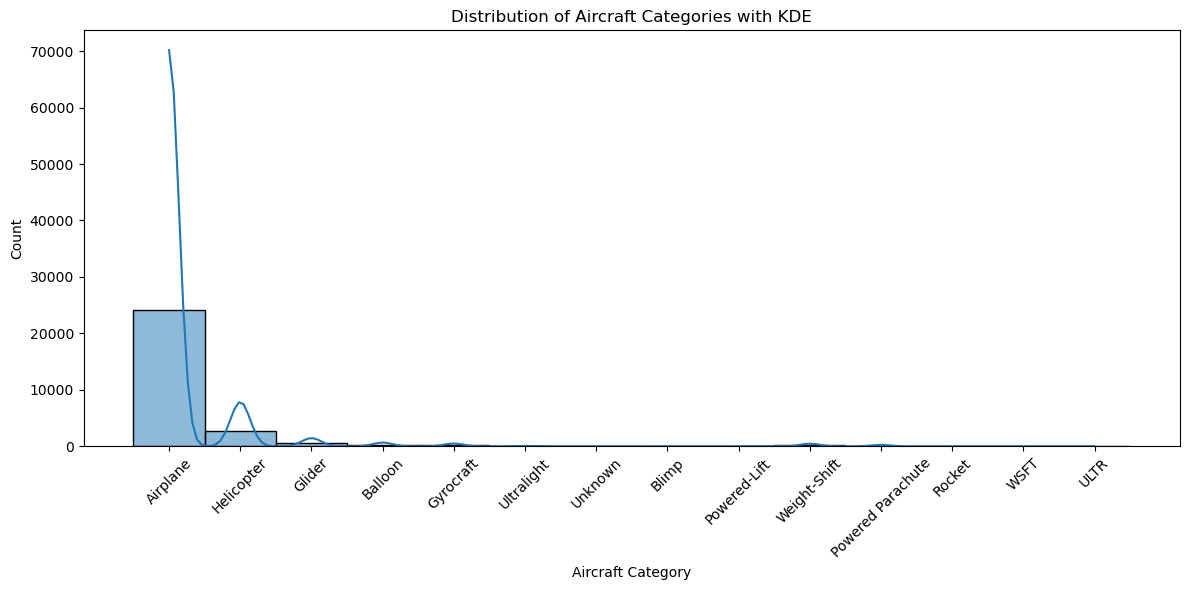

In [83]:
#histo plot
plt.figure(figsize=(12, 6))
sns.histplot(data=us_data, x='aircraft_category', kde=True, stat='count', discrete=True)

plt.xticks(rotation=45)
plt.title('Distribution of Aircraft Categories with KDE')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [84]:
us_data['aircraft_category'] = us_data['aircraft_category'].fillna("Airplane")

In [85]:
us_data['aircraft_category'].unique()

array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

## REGISTRATION NUMBER
The `registration_number` column turned out to be trickier and noisier than expected. Based on research and general aviation knowledge, every aircraft is supposed to have a unique registration number — similar to a license plate for cars.

---

##  Key Findings

### 1. **Duplicates Exist**
Some `registration_number` values appear more than once in the dataset. This could suggest:

- Multiple incidents involving the same aircraft over time (which is valid),
- Registration number reuse over time (common after an aircraft is decommissioned),
- Or possible data entry errors or truncation.

---

### 2. **Shared Registration Numbers Across Different Aircraft**
There are cases where:

- The same registration number is associated with different makes and models,
- Some entries even share similar event locations — possibly indicating recycled registrations, duplicate records, or poor documentation.

---

### 3. **Placeholder Values**
Many entries use generic or placeholder values like `"NONE"`, `"UNREG"`, and `"USAF"`. These typically indicate:

- Unregistered aircraft (especially experimental or military),
- Law enforcement or military aircraft with non-standard ID systems,
- Or situations where the actual registration wasn't available.

---

### 4. **Incomplete or Truncated IDs**
Some entries appear to be cut off or formatted inconsistently, making exact matching challenging without reliable external data like the FAA registry.

---

##  My Decision

Given that:

- The `registration_number` column is not essential to my core analysis goals,
- There is insufficient supporting data to clean or categorize entries properly,
- And time is limited,

✅ I chose to:

- Fill missing values with `"UNKNOWN"`:

In [86]:
us_data['registration_number'].unique()

array(['NC6404', 'N5069P', 'N5142R', ..., 'N749PJ', 'N210CU', 'N9026P'],
      dtype=object)

In [87]:
us_data['registration_number'].isna().sum()

np.int64(116)

In [88]:

reg_counts = us_data[~us_data['registration_number'].isin(['NONE', 'UNREG'])]['registration_number'].value_counts()
reg_counts[reg_counts > 1].head(30)


registration_number
USAF      9
N20752    8
UNK       7
N8402K    6
N5408Y    6
N121CC    6
N4101E    6
N53893    6
N11VH     6
N8653Y    5
N93067    5
N3125N    5
N9957J    5
N3331R    5
N8597D    5
N75LE     5
N32133    5
N5246E    5
N99HV     5
N420SB    5
USN       5
N2839V    4
N48687    4
N339T     4
N9299D    4
N4246T    4
N1047F    4
N1613M    4
N6628Q    4
N2LU      4
Name: count, dtype: int64

In [89]:
us_data[us_data['registration_number'] == 'N20752'][['event_date', 'aircraft_make', 'aircraft_model', 'location']].sort_values('event_date')


,event_date,aircraft_make,aircraft_model,location
21673,1988-11-22,Cessna,A185F,"DEADHORSE, AK"
29835,1992-05-03,Cessna,C-A185F,"BARROW, AK"
31367,1992-11-28,Cessna,185,"POINT HOPE, AK"
32977,1993-08-13,Cessna,185,"POINT BARROW, AK"
35599,1994-10-15,Cessna,A185F,"KOTZEBUE, AK"
39441,1996-08-02,Cessna,185,"WAINWRIGHT, AK"
41655,1997-08-25,Cessna,185F,"BARROW, AK"
47714,2000-08-11,Cessna,185F,"BARROW, AK"


In [90]:
us_data['registration_number']= us_data['registration_number'].fillna('UNKNOWN')

## AIRCRAFT MAKE AND MODEL

This columns were kind to my sanity, with only 21 and 38 missing values respectively i will fill them with unknown, and standardize the colum removing white spaces and including hyphens in the relevant situation since on the model columns the numbers,casings and hyphens have meaning so i will just strip

In [91]:
us_data['aircraft_make'].value_counts()

aircraft_make
Cessna                21573
Piper                 11661
CESSNA                 4280
Beech                  4167
PIPER                  2507
                      ...  
Steven R. Jackson         1
Weste                     1
Arthur P. Matthews        1
Tolle                     1
ROYSE RALPH L             1
Name: count, Length: 8001, dtype: int64

In [92]:
us_data['aircraft_model'].value_counts()

aircraft_model
152             2323
172             1637
172N            1136
PA-28-140        910
150              790
                ... 
YAK C-11           1
2180A              1
B206-BIII          1
THORP T18CWS       1
PA42               1
Name: count, Length: 11443, dtype: int64

In [93]:
us_data['aircraft_model'].isna().sum()

np.int64(38)

In [94]:
us_data['aircraft_make'].isna().sum()

np.int64(21)

In [95]:
us_data['aircraft_make'] = us_data['aircraft_make'].fillna('UNKNOWN')
us_data['aircraft_make'] = us_data['aircraft_make'].str.replace(r'\s+', '-', regex=True).astype('string').str.upper()


In [96]:
us_data['aircraft_model'] = us_data['aircraft_model'].fillna('UNKNOWN')
us_data['aircraft_model'] = us_data['aircraft_model'].str.strip()


## AMATURE MODEL
**Amateur Built** ,also known as homebuilt, experimental, or kit aircraft refers to aircraft constructed by individuals, rather than certified aircraft manufacturers. These are usually built:

From kits sold by aviation companies

From plans using raw materials

Sometimes entirely custom-designed by the builder

### The FAA's View

In the U.S., the FAA classifies these as “Experimental - Amateur-Built” aircraft. The idea is that at least 51% of the aircraft must be built by amateurs for education, recreation, or personal use.

In my analysis i will fill the values with unknown and proceed to standardize everything

In [97]:
us_data['amateur_built'] = us_data['amateur_built'].fillna('UNKNOWN')
us_data['amateur_built'] = us_data['amateur_built'].str.strip().str.upper()


## NUMBER OF ENGINES




I leveraged reliable information from the aircraft **aircraft_make** and **aircraft_odel** columns to accurately retrieve the number of engines for missing entries. While this was straightforward for well-known models, it required considerable manual mapping using domain knowledge and external research.

Eventually, this manual process plateaued — most of the remaining aircraft models were consistently single-engine types. Out of over 1,000 missing values, I had successfully mapped 400+, all of which had one engine. To validate this assumption, I examined the tail end of the unmapped entries and found the pattern persisted.

To save time and effort without compromising accuracy, I decided to impute the remaining missing values as **1**. This decision was further backed by a distribution plot showing a strong dominance of single-engine aircraft across the dataset.


In [98]:
engine_impute_map = {
    ('SCHWEIZER', 'SGS 2-33A'): 0,
    ('SCHWEIZER', 'SGS-2-33A'): 0,
    ('BALLOON-WORKS', 'FIREFLY 7'): 0,
    ('LET', 'L-13'): 0,
    ('LET', 'BLANIK L-13'): 0,
    ('SCHWEIZER', 'SGS 1-26E'): 0,
    ('I.C.A.-BRASOV', 'IS-28B2'): 0,
    ('BEECH', 'A36'): 1,
    ('CIRRUS', 'SR22'): 1,
    ('BEECH', '35'): 1,
    ('BURKHART-GROB', 'G103'): 0,
    ('CESSNA', '172'): 1,
    ('PIPER', 'PA28'): 1,
    ('BELL', '206'): 1,
    ('SCHWEIZER', 'SGS 1-34'): 0,
    ('CESSNA', 'A185'): 1,
    ('BALLOON-WORKS', 'FIREFLY 8-24'): 0,
    ('CAMERON', 'V-77'): 0,
    ('BOEING', '777'): 2, 
    ('PIPER', 'PA32R'): 1,
    ('BEECH', 'V35'): 1,
    ('RAVEN', 'RX-7'): 0,  
    ('SCHWEIZER', '2-33A'): 0,  
    ('CESSNA', '172N'): 1,
    ('AIR-TRACTOR-INC', 'AT 602'): 1,  
    ('SCHEMPP-HIRTH', 'STANDARD CIRRUS'): 0,
    ('HUGHES', '369D'): 1,  
    ('SCHWEIZER', 'SGS 2-33'): 0,
    ('PICCARD', 'AX-6'): 0,  
    ('ROLLADEN-SCHNEIDER', 'LS-4'): 0,  
    ('BEECH', '36'): 1, 
    ('PIPER', 'PA28R'): 1,  
    ('AEROSTAR', 'S-60A'): 0,  
    ('', 'S-77A'): 0,  
    ('SCHLEICHER', 'ASW-19'): 0,
    ('SCHEMPP-HIRTH', 'VENTUS-B'): 0,  
    ('AEROSTAR', 'RX-8'): 0,  
    ('PIPER', 'PA-18'): 1,
    ('WSK-PZL-KROSNO', 'KR-03A'): 0,  
    ('ADAMS', 'A55S'): 1,  
    ('AEROSTAR', 'S-77A'): 0,  
    ('SCHWEIZER', 'SGS 1-36'): 0,  
    ('BOEING', '737'): 2,
    ('BOEING', '757'): 2,
    ('LET', 'L 23 SUPER BLANIK'): 0,  
    ('LET', 'L-23'): 0,  
    ('RAVEN', 'S-60A'): 0,  
    ('AIRBUS', 'A320'): 2,
    ('CESSNA', 'T210'): 1,  
    ('AEROSTAR', 'S-66A'): 0,  
    ('PIPER', 'PA-28-181'): 1, 
    ('BURKHART-GROB', 'G102'): 0,  
    ('CESSNA', '182'): 1,
    ('BURKHART-GROB', '103'): 0,  
    ('AEROSTAR', 'RX 8'): 0,  
    ('SCHLEICHER', 'ASW-20'): 0, 
    ('BOEING', '737-300'): 2,
    ('UNKNOWN', 'UNKNOWN'): np.nan,
    ('RAVEN', 'S-66A'): 0,  
    ('SCHWEIZER', '269C'): 1,  
    ('BALLOON-WORKS', 'FIREFLY-7'): 0,
    ('ERCOUPE', '415'): 1, 
    ('BALLOON-WORKS', 'FIREFLY 8'): 0,
    ('AEROSTAR', 'RX-7'): 0,
    ('BALLOON-WORKS', 'FIREFLY 8B'): 0,
    ('SCHWEIZER', 'SGS 1-26B'): 0,  
    ('RAVEN', 'S60A'): 0,  
    ('SCHWEIZER', 'SGS 1-35'): 0,  
    ('GENERAL-BALLOON', 'AX-6'): 0,
    ('BELL', '206-L4'): 1,  
    ('CESSNA', 'T188C'): 1,  
    ('RAVEN', 'S55A'): 0,
    ('SCHWEIZER', 'SGS 1-26C'): 0,
    ('CHAMPION', '7ECA'): 1, 
    ('SCHWEIZER', 'SGS 2-32'): 0,
    ('GRUMMAN-ACFT-ENG-COR-SCHWEIZER', 'G 164A'): 1,  
    ('I.C.A.-BRASOV', 'IS-29D2'): 0,  
    ('RAVEN', 'S-66A'): 0, 
    ('SCHWEIZER', '269C'): 1, 
    ('BALLOON-WORKS', 'FIREFLY-7'): 0,
    ('ERCOUPE', '415'): 1, 
    ('BALLOON-WORKS', 'FIREFLY 8'): 0,
    ('AEROSTAR', 'RX-7'): 0,
    ('BALLOON-WORKS', 'FIREFLY 8B'): 0,
    ('SCHWEIZER', 'SGS 1-26B'): 0,  
    ('RAVEN', 'S60A'): 0,  
    ('SCHWEIZER', 'SGS 1-35'): 0,  
    ('GENERAL-BALLOON', 'AX-6'): 0,
    ('BELL', '206-L4'): 1, 
    ('CESSNA', 'T188C'): 1,  
    ('RAVEN', 'S55A'): 0,
    ('SCHWEIZER', 'SGS 1-26C'): 0,
    ('CHAMPION', '7ECA'): 1,  
    ('SCHWEIZER', 'SGS 2-32'): 0,  # Glider
    ('GRUMMAN-ACFT-ENG-COR-SCHWEIZER', 'G 164A'): 1,  
    ('I.C.A.-BRASOV', 'IS-29D2'): 0,
    ('CESSNA', 'TR182'): 1,
    ('CESSNA', '210'): 1,
    ('SCHWEIZER', 'SGS2-33A'): 0,
    ('SCHLEICHER', 'ASK-21'): 0,
    ('AIRBUS-INDUSTRIE', 'A320'): 2,
    ('CESSNA', '185'): 1,
    ('BARNES', 'AX-7'): 0,
    ('GLASFLUGEL', 'H-301'): 0,
    ('SCHEMPP-HIRTH', 'DISCUS A'): 0,
    ('SCHWEIZER', 'SGS 1-26A'): 0,
    ('BELLANCA', '8GCBC'): 1,
    ('LET', 'L-23 SUPER BLANIK'): 0,
    ('CESSNA', 'TU206'): 1,
    ('CESSNA', 'T210N'): 1,
    ('EMBRAER', 'ERJ170'): 2,
    ('GRUMMAN', 'G164'): 1,
    ('BALLOON-WORKS', 'FIREFLY 8B-15'): 0,
    ('AIR-TRACTOR', 'AT502'): 1,
    ('AIR-TRACTOR', 'AT802'): 1,
    ('CESSNA', 'A185F'): 1,
    ('HEAD-BALLOONS,-INC.', 'AX8-88'): 0,
    ('BOEING', '747'): 4,
    ('CESSNA', '180'): 1,
    ('SCHWEIZER', '2-32'): 0,
    ('BALLOON-WORKS', 'FIREFLY 7-B'): 0,
    ('BALLOON-WORKS', 'FIREFLY 7-15'): 0,
    ('ROLLADEN-SCHNEIDER', 'LS-4A'): 0,
    ('AIR-TRACTOR-INC', 'AT 502B'): 1,
    ('FLIGHT-DESIGN', 'CTLS'): 1,
    ('PIPER', 'PA-31-350'): 2,
    ('BOEING', '787'): 2,
    ('CESSNA', 'A188'): 1,
    ('TAYLORCRAFT', 'BC12 D'): 1,
    ('SCHWEIZER', 'SGS 1-26'): 0,
    ('AMERICAN-EUROCOPTER-CORP', 'AS350B3'): 1,
    ('EIRIAVION-OY', 'PIK 20D'): 0,
    ('ROLLADEN-SCHNEIDER', 'LS-6'): 0,
    ('ZENITH', 'CH 750'): 1,
    ('PZL-BIELSKO', 'SZD-59'): 1,
    ('CENTRAIR', '101A'): 1,
    ('DE-HAVILLAND', 'DHC-2'): 1,
    ('EMBRAER', 'EMB145'): 2,
    ('BALLOON-WORKS', 'AX-8B'): 1,
    ('SCHEMPP-HIRTH', 'DISCUS CS'): 1,
    ('BOMBARDIER-INC', 'CL-600-2B19'): 2,
    ('BALLOON-WORKS', 'FF-7'): 1,
    ('BALLOON-WORKS', 'FIRE FLY 7'): 1,
    ('BALLOON-WORKS', 'FIRE FLY 7-15'): 1,
    ('BALLOON-WORKS', 'FIRE FLY 8-24'): 1,
    ('BALLOON-WORKS', 'FIREFLY 11'): 1,
    ('CESSNA', 'P210N'): 1,
    ('SIKORSKY', 'S76'): 2,
    ('BALLOON-WORKS', 'FIREFLY 7B'): 1,
    ('CESSNA', 'T182T'): 1,
    ('BALLOON-WORKS', 'FIREFLY 9'): 1,
    ('EIRIAVION-OY', 'PIK-20B'): 1,
    ('BOMBARDIER', 'CL 600 2C10'): 2,
    ('GROB', 'G102'): 1,
    ('LINDSTRAND', '105A'): 1,
    ('BOEING', '757-200'): 2,
    ('PIPER', 'PA-28-161'): 1,
    ('CESSNA', '441'): 2,
    ('LITHUANIAN-FACTORY-OF-AVIATION', 'LAK-12'): 1,
    ('PIPER', 'PA-28-180'): 1,
    ('BURKHART-GROB', 'G 103 TWIN II'): 1,
    ('CHAMPION', '7EC'): 1,
    ('MCDONNELL-DOUGLAS-HELICOPTER', '369E'): 1,
    ('FLIGHT-DESIGN-GMBH', 'CTSW'): 1,
    ('BURKHART-GROB', 'G-102'): 1,
    ('BURKHART-GROB', 'G-103'): 1,
    ('BEECH', '95 B55 (T42A)'): 2,
    ('BEECH', '95 C55'): 2,
    ('ROLLADEN-SCHNEIDER', 'LS3-A'): 1,
    ('GLASFLUGEL', 'H 301 B LIBELLE'): 1,
    ('BURKHART-GROB', 'G-103-TWIN II'): 1,
    ('BURKHART-GROB', 'G-103A Twin II Acro'): 1,
    ('BELL', '430'): 2,
    ('THUNDER-AND-COLT', 'AX9-140'): 1,
    ('BOEING', '737-700'): 2,
    ('BURKHART-GROB', '102'): 1,
    ('BURKHART-GROB', '103A'): 1,
    ('BARNES', 'FIREFLY 7'): 1,
    ('CESSNA', '208B'): 1,
    ('LET', 'L13'): 1,
    ('BEECH', '200'): 2,
    ('BEECH', '23'): 1,
    ('LET', 'L 33 SOLO'): 1,
    ('LEARJET', '45'): 2,
    ('BEECH', '55'): 2,
    ('SCHEIBE-FLUGZEUGBAU', 'BERGFALKE II-55'): 1,
    ('SCHWEIZER', 'SGS-233A'): 1,
    ('BLANIK', 'L-13'): 1,
    ('BURKHART-GROB', 'G103 TWIN ASTIR'): 1,
    ('BURKHART-GROB', 'G103 TWIN II'): 1,
    ('SCHLEICHER', 'K8B'): 1,
    ('HILLER', 'UH 12D'): 1,
    ('CUB-CRAFTERS', 'CCK-1865'): 1,
    ('NORTH-AMERICAN', 'NAVION'): 1,
    ('BELL', 'UH 1H'): 1,
    ('SCHWEIZER', '2-33'): 0,
    ('SCHWEIZER', '2-33-A'): 0,
    ('BELL', '206B-III'): 1,
    ('BELL', '206-B3'): 1,
    ('SCHWEIZER', 'SGS 1 34'): 0,
    ('SCHWEIZER', 'SGS 1-26D'): 0,
    ('BEECH', 'F33'): 1,
    ('BEECH', 'E 55'): 2,
    ('COSTRUZIONI-AERONAUTICHE-TECNA', 'P92 EAGLET'): 1,
    ('SCHWEIZER', 'SGS-1-26E'): 0,
    ('ULTRAMAGIC', 'N250 - NO SERIES'): 0,
    ('MCDONNELL-DOUGLAS', 'MD-83'): 2,
    ('SCHWEIZER', 'SGS233'): 0,
    ('SCHWEIZER', 'SGU-2-22E'): 0,
    ('SCHWEIZER', 'SGU2-22E'): 0,
    ('CAMERON', 'A-140'): 0,
    ('SCHWEIZER', 'SGS-1-26B'): 0,
    ('SCHLEICHER', 'ASW 27'): 0,
    ('SCHLEICHER', 'ASW-20B'): 0,
    ('BELLANCA', '7GCAA'): 1,
    ('CESSNA', 'T240'): 1,
    ('CESSNA', 'T310R'): 2,
    ('CESSNA', 'U206F'): 1,
    ('DIAMOND', 'DA20'): 1,
    ('CESSNA', '525'): 2,
    ('AYRES', 'S2R'): 1,
    ('LUSCOMBE', '8E'): 1,
    ('SPROUL', '72K-TET'): 1,
    ('EMBRAER', 'ERJ190'): 2,
    ('EUROCOPTER', 'EC 130 B4'): 1,
    ('ULTRAMAGIC', 'N-250'): 0,
    ('CESSNA', 'A188B'): 1,
    ('BOEING', '767'): 2,
    ('VANS', 'RV6'): 1,
    ('RAVEN', 'S77A'): 0,
    ('AEROSTAR', 'RAVEN S57-A'): 0,
    ('WEATHERLY', '620'): 1,
    ('AEROSTAR', 'RX8'): 0,
    ('AEROSTAR', 'RXS-8'): 0,
    ('AEROSTAR', 'S-55A'): 0,
    ('GLASFLUGEL', 'STANDARD LIBELLE'): 0,
    ('VANS', 'RV8'): 1,
    ('ROBINSON', 'R44'): 1,
    ('AEROSTAR-INTERNATIONAL', 'RX8'): 0,
    ('ROCKWELL-INTERNATIONAL', 'S 2R'): 1,
    ('HUGHES', '369A'): 1,
    ('PIPER', 'PA32RT'): 1,
    ('BRANTLY', 'B 2B'): 1,
    ('CESSNA', '150'): 1,
    ('BOEING', 'E75'): 1,
    ('SCHEMPP-HIRTH', 'CIRRUS'): 0,
    ('CESSNA', '172P'): 1,
    ('PIPER', 'PA-22-150'): 1,
    ('GULFSTREAM', 'GIV'): 2,
    ('AERO-COMMANDER', 'S2R'): 1,
    ('AEROSPATIALE', 'AS350'): 1,
    ('AERONCA', '7AC'): 1,
    ('CAMERON', 'O-65'): 0,
    ('QUAD-CITY', 'CHALLENGER'): 1,
    ('GROB', 'G103'): 0,
    ('SCHEMPP-HIRTH', 'NIMBUS II'): 0,
    ('AEROSTAR', 'RAVEN S49A'): 0,
    ('RAVEN', 'S-55A'): 0,
    ('SCHEMPP-HIRTH', 'VENTUS A'): 0,
    ('SCHEMPP-HIRTH', 'VENTUS B/16.6'): 0,
    ('CAMERON', 'A-250'): 0,
    ('OTTERBACK', 'Lightning'): 1,
    ('NORTH-WING-UUM-INC', 'SPORT X2 912'): 1,
    ('O\'DELL', 'AEROMASTER'): 1,
    ('NORTHROP', 'N9M'): 4,
    ('NORTH-AMERICAN', 'SNJ'): 1,
    ('NORTH-AMERICAN', 'T28'): 1,
    ('1977-COLFER-CHAN', 'STEEN SKYBOLT'): 1,
    ('PIPER', 'PA 32R-300'): 1,
    ('NANCHANG', 'CJ 6'): 1,
    ('NANCHANG', 'CJ6'): 1,
    ('NATIONAL-BALLOON', 'AX-7'): 0,
    ('NATIONAL-BALLOONING-LTD', '858'): 0,
    ('NAVION', 'NAVION'): 1,
    ('NAVION', 'Navion A'): 1,
    ('NICKS', 'PW-5'): 0,
    ('NORTH-AMERICAN', 'AT6'): 1,
    ('NORTH-AMERICAN', 'AT6 - C'): 1,
    ('NORTH-AMERICAN', 'NAVION A'): 1,
    ('NORTH-AMERICAN', 'P 51D'): 1,
    ('NORTH-AMERICAN', 'SNJ-4'): 1,
    ('OWEN-KINGSLEY-B', 'VANS RV8'): 1,
    ('PADELT', 'PG37-1'): 0,
    ('PETRUS-DAVID-WAYNE', 'S90'): 1,
    ('PHOENIX-AIR-SRO', 'U-15 PHOENIX'): 1,
    ('PIAGGIO-INDUSTRIE', 'P180'): 2,
    ('AB-SPORTINE-AVIACIJA', 'GENESIS 2'): 0,
    ('PIETENPOL', 'AIRCAMPER'): 1,
    ('MONERAI', 'SAILPLANE'): 0,
    ('MONETT', 'MONARAI'): 0,
    ('MONOCOUPE', '110SP'): 1,
    ('MONTANA', 'Coyote'): 1,
    ('MOONEY', 'M20B'): 1,
    ('MOONEY', 'M20C'): 1,
    ('MOONEY', 'M20F'): 1,
    ('MOONEY', 'M20K'): 1,
    ('MOONEY', 'M20V'): 1,
    ('MOONEY-AIRCRAFT-CORP.', 'M20K'): 1,
    ('MX-AIRCRAFT-LLC', 'MXS'): 1,
    ('PICCARD', 'P-80'): 0,
    ('PIK', '20'): 0,
    ('PIPER', 'PA-24-260'): 1,
    ('PIK', 'PIK-20D'): 0,
    ('PILATUS', 'B-4'): 0,
    ('PILATUS', 'B4-PC11AF'): 0,
    ('ACRO', 'SUPER ACRO SPORT I'): 1,
    ('MCDONNELL-DOUGLAS-HELI-CO', '369FF'): 1,
    ('MEANS-ROBER-C', 'ROTORWAY EXEC'): 1,
    ('MEYERS', '200'): 1,
    ('MEYERS', 'MAC 145'): 1,
    ('MICHAEL-V-CRANFORD', 'VANS RV-4'): 1,
    ('MICHAEL-WILSON', 'MURPHY SPIRIT'): 1,
    ('MICROLITES-PTYLTD', 'Dragonfly B'): 1,
    ('MILLER,-TERRY-W.', 'TERN'): 0,
    ('MILLS-MICHAEL', 'S1L'): 1,
    ('MITSUBISHI', 'MU 300'): 2,
    ('MITSUBISHI', 'MU2B'): 2,
    ('MOLINO-OY', 'PIK-20'): 0,
    ('MOLINO-OY', 'PIK-20B'): 0,
    ('PIPER', 'J3C'): 1,
    ('PIPER', 'J5A'): 1,
    ('PIPER', 'PA 14'): 1,
    ('PIPER', 'PA 15'): 1,
    ('PIPER', 'PA 16'): 1,
    ('ADAMS', 'A-60'): 1,
    ('PIPER', 'PA-44 SEMINOLE'): 1,
    ('MCDONNELL-DOUGLAS', 'DC-9-83(MD-83)'): 2,
    ('MCDONNELL-DOUGLAS', 'MD 90-30'): 2,
    ('MCDONNELL-DOUGLAS', 'MD-80'): 2,
    ('MCDONNELL-DOUGLAS', 'MD11'): 3,
    ('MCDONNELL-DOUGLAS', 'MD80'): 2,
    ('MCDONNELL-DOUGLAS', 'MD82'): 2,
    ('MCDONNELL-DOUGLAS', 'MD88'): 2,
    ('MCDONNELL-DOUGLAS', 'OH-6A'): 1,
    ('MCDONNELL-DOUGLAS-AIRCRAFT-CO', 'MD 88'): 2,
    ('MD-HELICOPTER', '369'): 1,
    ('PIPER', 'PA 31P'): 2,
    ('PIPER', 'PA 32R-301'): 1,
    ('PIPER', 'PA 46-350P'): 1,
    ('PIPER', 'PA-18-150'): 1,
    ('PIPER', 'PA-22'): 1,
    ('PIPER', 'PA-24-250'): 1,
    ('PIPER', 'PA-25'): 1,
    ('ADAMS', 'A60S'): 1,
    ('PIPER', 'PA-28'): 1,
    ('MAULE', 'MX7'): 1,
    ('MAULE', 'MXT-7-180A'): 1,
    ('MAULE', 'MXT7'): 1,
    ('MBB', 'BK117'): 2,  
    ('MBB', 'BO-105'): 2, 
    ('MBB', 'PHOEBUS C'): 0,
    ('MCCUTCHAN', 'Glasair'): 1,
    ('MCDONNELL-DOUGLAS', '369E'): 1,
    ('MCDONNELL-DOUGLAS', '600'): 2, 
    ('MCDONNELL-DOUGLAS', 'DC 9 33F'): 2,
    ('MCDONNELL-DOUGLAS', 'DC-9-82 (MD-82)'): 2,
    ('PIPER', 'PA-28-140'): 1,
    ('MAULE', 'MX 7-180B'): 1,
    ('PIPER', 'PA-28-151'): 1,
    ('PIPER', 'PA-32-260'): 1,
    ('PIPER', 'PA-32-300'): 1,
    ('PIPER', 'PA-32R-300'): 1,
    ('ADAMS', 'AB'): 1,
    ('PIPER', 'PA-32R-301'): 1,
    ('MARINO', 'Benoist Type XIV'): 1,
    ('MARK-GOLDBERG', 'BEARHAWK PATROL'): 1,
    ('MARSH-TURNER', 'BG-12A'): 0, 
    ('MAS-EVENTS', 'NEMESIS'): 1,
    ('MASAK', 'SCIMITAR'): 0,  
    ('MATTHEWS-H-THOMAS', 'JODEL   F11 A'): 1,
    ('MAULE', 'M 6-235'): 1,
    ('MAULE', 'M4-220C'): 1,
    ('MAULE', 'M6'): 1,
    ('MAULE', 'M7'): 1,
    ('MAULE', 'MX 7-235'): 1,
    ('PIPER', 'PA-32RT'): 1,
    ('PIPER', 'PA36'): 1,
    ('PIPER', 'PA-32RT-300T'): 1,
    ('PIPER', 'PA-38-112'): 1,
    ('PIPER', 'PA-44-180'): 2,  
    ('PIPER', 'PA-46'): 1,
    ('PIPER', 'PA-46-500TP'): 1,
    ('PIPER', 'PA12'): 1,
    ('PIPER', 'PA18'): 1,
    ('PIPER', 'PA22'): 1,
    ('PIPER', 'PA23'): 2,
    ('ADAMS', 'AX-9'): 0,  
    ('PRUE-IRVING-OWEN', '160'): 0,  
    ('LINDSTRAND-BALLOONS-USA', '120A'): 0,  
    ('LINSTRAND', '240A'): 0,  
    ('LOCKHEED', 'C130'): 4, 
    ('LOCKHEED', 'L1011'): 3,  
    ('LOCKHEED', 'P2V-7'): 2,  
    ('LUDEMAN', 'HP-18'): 0,  
    ('LUSCOMBE', '8A'): 1,
    ('LUSCOMBE', '8B'): 1,
    ('LUSCOMBE', 'T-8F'): 1,
    ('LYONS-ROBERT', 'NAVAJO HKS'): 2, 
    ('M-SQUARED', 'Sport 1000'): 1,
    ('M-SQUARED-AIRCRAFT', 'SPRINT 1000'): 1,
    ('MAARTEN-H-VERSTEEG', 'ZENITH 601XL(B)'): 1,
    ('MACDONALD-CRAIG', 'MAC CUB'): 1,
    ('MAGNI', 'MAGNI M 16'): 1,  
    ('PIPER', 'PA31'): 2,
    ('PIPER', 'PA31T'): 2,
    ('PIPER', 'PA32'): 1,
    ('PIPER', 'PA34'): 2,
    ('PIPER', 'PA44'): 2,
    ('PIPER', 'PA46'): 1,
    ('PIPISTREL', 'Apis-Bee'): 0,
    ('AERO-COMMANDER', '200'): 2,
    ('LINDSTRAND-BALLOONS', '105A'): 0,
    ('LET', 'Blanik L-13'): 0,
    ('LET', 'L-23 SUPER BLANKIT'): 0,
    ('LET', 'L-33-SOLO'): 0,
    ('LET', 'L23'): 0,
    ('LET', 'SUPER BLANIK L-23'): 0,
    ('LET', 'SUPER BLANIK L-33'): 0,
    ('LIGHTNING-AVION-EAB-LLC', 'Arion Lightning'): 1,
    ('LINDSTRAND', '180A'): 0,
    ('LINDSTRAND', 'LBL-105G'): 0,
    ('LINDSTRAND', 'LBL69A'): 0,
    ('LINDSTRAND-BALLOONS', '150A'): 0,
    ('LEARJET', '35'): 2,
    ('LINDSTRAND-BALLOONS', '90A'): 0,
    ('LINDSTRAND-BALLOONS', 'LBL'): 0,
    ('POWRACHUTE', 'AIRWOLF'): 1,
    ('PRATT-READ', 'PRG-1'): 0,
    ('PROGRESSIVE-AERODYNE', 'SEAREY'): 1,
    ('PRUE-STANDARD', 'UNKNOWN'): 0,
    ('PURDY', 'HP-18'): 0,
    ('PZL-BIELSKO', 'JANTAR 2A'): 0,
    ('PZL-BIELSKO', 'SZD 50-3'): 0,
    ('PZL-BIELSKO', 'SZD 55-1'): 0,
    ('AERO-COMMANDER', '500'): 1,
    ('KOLB-COMPANY', 'FIRESTAR'): 1,
    ('KUBICEK', 'BB100'): 1,
    ('KUBICEK', 'BB30'): 1,
    ('KUBICEK', 'BB60'): 1,
    ('KUBICEK', 'BB85'): 1,
    ('LAISTER', 'LK10'): 1,
    ('LAISTER', 'LP-15'): 1,
    ('LAISTER', 'LP-49'): 1,
    ('LAKE', 'LA4'): 1,
    ('LANCAIR', '360'): 1,
    ('LANCAIR', 'IV'): 1,
    ('LANCAIR', 'LC41'): 1,
    ('LANCAIR', 'LEGACY RG'): 1,
    ('LARK-AVIATION', 'IS28B2'): 1,
    ('LET', 'Blanik'): 1,
    ('PZL-BIELSKO', 'SZD-48-3'): 1,
    ('PZL-BIELSKO', 'SZD-55-1'): 1,
    ('PZL-SWIDNIK', 'PW 5'): 1,
    ('QUICKIE', 'Q2'): 1,
    ('QUICKSILVER', 'MX II Sprint'): 1,
    ('QUICKSILVER', 'MXL II'): 1,
    ('QUICKSILVER', 'Sport'): 1,
    ('RAF', 'SE5A'): 1,
    ('AERO-COMMANDER', '680'): 1,
    ('RAVEN', 'AX-9'): 1,
    ('JOHNSON', 'Harmon Rocket'): 1,
    ('JONES', 'HATZ CB1'): 1,
    ('JONKER-SAILPLANES', 'JS1C'): 1,
    ('JONKER-SAILPLANES-(PTY)-LTD', 'JS1-C'): 1,
    ('JORDAN-JOHN', 'RV7'): 1,
    ('JUDD', 'Challenger II'): 1,
    ('JUST', 'JA30 SUPERSTOL'): 1,
    ('KENNETH-B-HINES', 'NIEUPORT 28'): 1,
    ('KITFOX', 'S7'): 1,
    ('KJOSTAD-JORGEN-A', 'WAGABOND'): 1,
    ('KNAPP', 'Easy Raider'): 1,
    ('KNELL', 'ASC SPIRIT'): 1,
    ('KOLB', 'FIRESTAR 2'): 1,
    ('KRELING', 'Supercat'): 1,
    ('RAINBOW-AIRCRAFT-(PTY)-LTD', 'AEROTRIKE'): 1,
    ('RANDY-WAYNE-MALONEY', 'M1'): 1,
    ('RANS', 'S12'): 1,
    ('RANS,-INC.', 'Rans S-6ES'): 1,
    ('RANS-S-12', 'Airaile'): 1,
    ('RATTE-JAMES', 'AVENTURA II'): 1,
    ('RAVEN', 'AERO STAR S-66A'): 1,
    ('RAVEN', 'AS-55A'): 1,
    ('AERO-TEK,-INC.', 'ZUNI'): 1,
    ('HUGHES', '369HS'): 1,
    ('HUGHES', '500D'): 1,
    ('HUGHES', 'OH 6A'): 1,
    ('HUGHES', 'TH 55A'): 1,
    ('I.C.A.-BRASOV', 'IS-26B2'): 1,
    ('I.C.A.-BRASOV', 'IS-28-B2'): 1,
    ('I.C.A.-BRASOV', 'IS-29D'): 1,
    ('I.C.A.-BRASOV', 'LARK I-28-B2'): 1,
    ('I.C.A.-BRASOV-(ROMANIA)', 'IS 29D'): 1,
    ('ICON', 'A5'): 1,
    ('ICP', 'Savannah'): 1,
    ('RAVEN', 'S-77A'): 1,
    ('JACK-MCDANIEL', 'Rans S-12'): 1,
    ('JAMES', 'Experimental Cub'): 1,
    ('JAVRON', 'PA-18 Replica'): 1,
    ('JEROME-A-BAAK', 'CH 601XL'): 1,
    ('RAVEN', 'AX-8'): 1,
    ('RAVEN', 'R-7'): 1,
    ('RAVEN', 'RALLEY RX7'): 1,
    ('RAVEN', 'RALLY II'): 1,
    ('RAVEN', 'RALLY RX7'): 1,
    ('RAVEN', 'RX-6'): 1,
    ('HUGHES', '369'): 1,
    ('HEAD', 'AX9-118'): 1,
    ('HEAD-BALLOONS,-INC.', 'AX9-118'): 1,
    ('HENRY-STEVEN-J', 'JUST ACFT SUPERSTOL'): 1,
    ('HI-MAX', 'HI-MAX'): 1,
    ('HILL-GROUP-LLC', 'CCX-2000'): 1,
    ('HILLER', 'UH 12E'): 1,
    ('HILLER', 'UH-12C'): 1,
    ('HILLER', 'UH-12E'): 1,
    ('HOGAN', 'Innovator'): 1,
    ('HOLMES', 'Challenger II'): 1,
    ('HOOVER-DAVID', 'ARNOLD AR 6'): 1,
    ('AERO-TEK-INC.', 'ZUNI'): 1,
    ('HPH-LTD', '304CZ'): 1,
    ('HUEBBE', 'Sonex HB'): 1,
    ('HUGHES', '269A'): 1,
    ('RAVEN', 'S-55A-707'): 1,
    ('RAVEN', 'S100A'): 1,
    ('RAVEN', 'S55A/AX7'): 1,
    ('RAYMOND-Z-BROWN', 'CONDOR'): 1,
    ('RAYTHEON', '58'): 1,
    ('RAYTHEON-AIRCRAFT-COMPANY', 'B200'): 1,
    ('RAYTHEON-CORPORATE-JETS', 'H25B'): 1,
    ('HEAD-BALLOONS,-INC.', 'AX7-77'): 1,
    ('HEAD', 'AX9 118'): 1
     
}

for (make, model), engine_count in engine_impute_map.items():
    us_data.loc[
        (us_data['aircraft_make'] == make) & 
        (us_data['aircraft_model'] == model) & 
        (us_data['number_of_engines'].isna()), 
        'number_of_engines'
    ] = engine_count


In [99]:
us_data['aircraft_make'].value_counts().head(20)

aircraft_make
CESSNA               25853
PIPER                14168
BEECH                 5059
BELL                  2285
BOEING                1485
MOONEY                1293
GRUMMAN               1142
BELLANCA              1040
ROBINSON               919
HUGHES                 874
SCHWEIZER              744
AIR-TRACTOR            644
AERONCA                635
MAULE                  577
CHAMPION               514
MCDONNELL-DOUGLAS      465
STINSON                439
LUSCOMBE               413
AERO-COMMANDER         397
TAYLORCRAFT            382
Name: count, dtype: Int64

In [100]:
us_data['aircraft_model'].value_counts().head(20)

aircraft_model
152          2323
172          1637
172N         1136
PA-28-140     910
150           790
172M          773
172P          680
180           617
182           589
PA-18-150     578
PA-18         578
150M          578
PA-28-180     567
PA-28-161     556
PA-28-181     516
206B          462
PA-38-112     460
G-164A        460
150L          452
A36           434
Name: count, dtype: int64

In [101]:
#us_data[us_data['number_of_engines'].isna()][['aircraft_make', 'aircraft_model']].value_counts().tail(25)


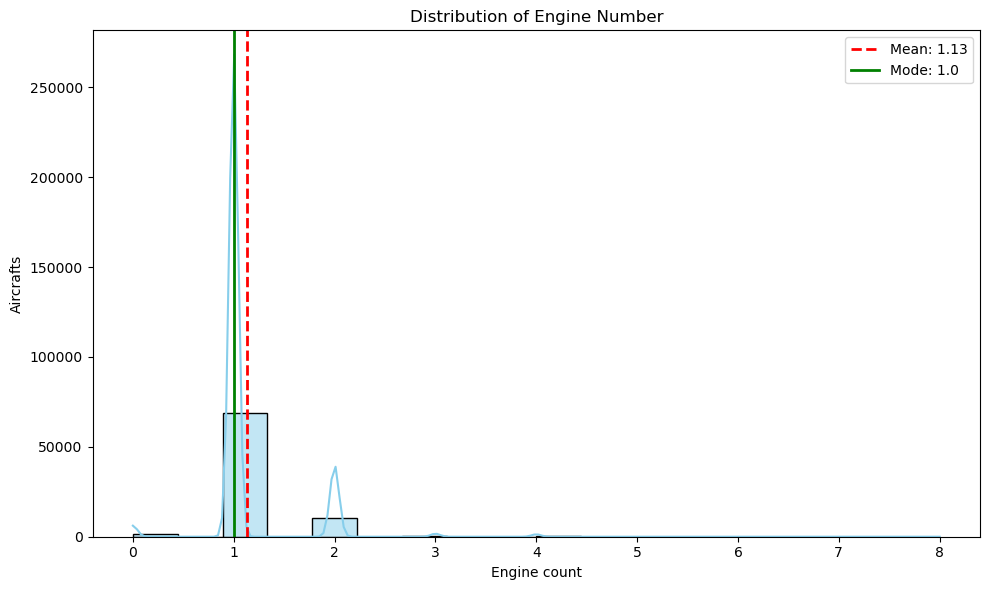

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(us_data['number_of_engines'], kde=True, color='skyblue', edgecolor='black')

mean_val = us_data['number_of_engines'].mean()
mode_val = us_data['number_of_engines'].mode()[0]

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(mode_val, color='green', linestyle='-', linewidth=2, label=f'Mode: {mode_val}')

plt.title('Distribution of Engine Number')
plt.xlabel('Engine count')
plt.ylabel('Aircrafts')
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
us_data['number_of_engines'].isna().sum()

np.int64(753)

In [104]:
us_data['number_of_engines'] = us_data['number_of_engines'].fillna(1)

## ENGINE TYPE

There were 3,042 missing values in the *Engine Type* column. To make a justifiable imputation, I examined the distribution of known engine types:

- **Reciprocating** – 68,507
- **Turbo Shaft** – 3,331
- **Turbo Prop** – 3,206
- **Turbo Fan** – 2,094
- **Unknown** – 1,385
- Others (Electric, Hybrid Rocket, LR, etc.) – rare (< 20 combined)

### Engine Type Descriptions:
| Engine Type      | Description |
|------------------|-------------|
| **Reciprocating** | Piston-driven engine similar to car engines. Common in small aircraft and general aviation. Typically low-power and uses 1–2 engines. |
| **Turbo Fan**     | Jet engine with a fan in front. Common in modern airliners and high-performance jets. Usually 2+ engines. |
| **Turbo Shaft**   | Jet engine used in helicopters. Drives a shaft to power rotors. |
| **Turbo Prop**    | Jet-powered engine that turns a propeller. Used in small commuter aircraft and bush planes. Typically 1 or 2 engines. |
| **Turbo Jet**     | Old-style pure jet engines, mostly found in vintage or military aircraft. Rare today. |
| **Electric**      | Found in experimental or very light sport aircraft. Emerging technology. |
| **Hybrid Rocket / LR / NONE / UNK** | Rare or placeholder values. Likely data inconsistencies or experimental craft. |

### Reasoning Behind Imputation:

The data shows that the vast majority of aircraft use **Reciprocating** engines. Given that most aircraft in the dataset also have a single engine and fall within the general aviation category, it is statistically and contextually reasonable to impute the missing values with **'Reciprocating'**.

This assumption avoids significant bias and aligns with the observed distribution, supported by both the dataset and basic domain knowledge about aircraft engine types.


In [105]:
us_data['engine_type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket', 'LR',
       'NONE', 'UNK'], dtype=object)

In [106]:
us_data['engine_type'].isna().sum()

np.int64(3042)

In [107]:
us_data['engine_type'].value_counts()

engine_type
Reciprocating    68507
Turbo Shaft       3331
Turbo Prop        3206
Turbo Fan         2094
Unknown           1385
Turbo Jet          667
Electric            10
LR                   2
NONE                 2
Hybrid Rocket        1
UNK                  1
Name: count, dtype: int64

/var/folders/0v/036y_w3j0cj0nq2z_v6pl7tw0000gn/T/ipykernel_5151/3769255624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=us_data, x='engine_type', order=us_data['engine_type'].value_counts().index,palette='Blues_d', edgecolor='black')


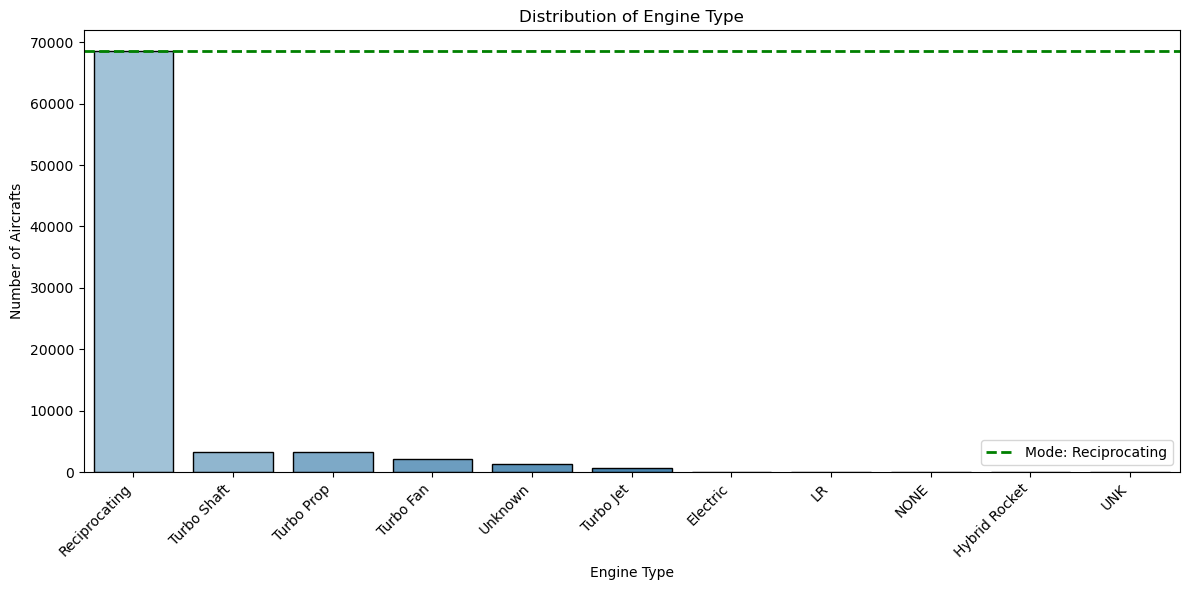

In [108]:

plt.figure(figsize=(12, 6))

sns.countplot(data=us_data, x='engine_type', order=us_data['engine_type'].value_counts().index,palette='Blues_d', edgecolor='black')    
          
mode_val = us_data['engine_type'].mode()[0]
plt.axhline(us_data['engine_type'].value_counts().max(), color='green', linestyle='--',label=f'Mode: {mode_val}', linewidth=2)
            
plt.title('Distribution of Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Aircrafts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [109]:
us_data['engine_type'] = us_data['engine_type'].fillna('Reciprocating')
us_data['engine_type'] = us_data['engine_type'].str.replace(r'\s+', '-', regex=True).astype('string').str.upper()

##  FAR DESCRIPTION

The `far_description` column shows the FAA regulation under which each flight was operated. It’s an important feature for identifying the operational context—whether the flight was general aviation, commercial, agricultural, or something else entirely.

###  Cleaning Process

This column was messy—some entries were full descriptions like `"Part 91: General Aviation"` while others were shorthand like `"091"`. I created a mapping that standardized everything into clean, consistent categories such as `"Part 91"`, `"Part 135"`, and so on.

For example:
- `"091"`, `"091K"`, and `"Part 91F: Special Flt Ops."` were all mapped to `"Part 91"`
- `"PUBU"`, `"Public Use"`, and `"Public Aircraft"` were grouped under `"Public Use"`
- Military designations like `"NUSC"`, `"NUSN"`, and `"ARMF"` became `"Military"`

I applied this mapping directly on the original `far_description` 

###  What about the missing values?

Originally, this column had **over 54,000 missing values**, which is a huge chunk out of the ~82,000 rows. I wanted to reduce that in a meaningful way without introducing bias. Here's what I did:

1. I built a reference map using the most frequent aircraft `make` and `model` combinations that already had valid `far_description` values.
2. Then, for each row that was still missing, I tried to infer the `far_description` based on its `make_model` or just the `make` if the combo wasn’t in the map.
3. If I couldn’t infer anything confidently, I left it as `'Unknown'`.

This brought the missing count down to **14,165**, which is a significant improvement.

### Further Explanations

To make this column easier to interpret, I added a new column called `far_description_explained` with short descriptions for each FAR Part. Here’s a quick breakdown of what each part means:

| FAR Part | Description |
|----------|-------------|
| Part 91  | General Operating and Flight Rules – covers non-commercial (general aviation) flights. |
| Part 121 | Air Carrier Operations – for scheduled commercial airlines and large aircraft. |
| Part 135 | Commuter and On-Demand Operations – includes air taxis, charter flights, small cargo. |
| Part 137 | Agricultural Aircraft Operations – crop dusting, aerial application, etc. |
| Part 129 | Foreign Air Carriers – operations of foreign airlines in U.S. airspace. |
| Part 133 | Rotorcraft External Load – operations involving lifting external loads with helicopters. |
| Part 125 | Large Aircraft Non-Commercial – 20+ passengers or over 6,000 lbs not under Part 121. |
| Part 103 | Ultralight Vehicles – very small, lightweight aircraft; no license required. |
| Part 107 | Commercial Drone Operations – rules for unmanned aerial systems (UAS). |
| Public Use | Government-operated or military aircraft not under civil FARs. |
| Military | Military aircraft operations (Navy, Army, or Defense-related). |
| Other | Other classifications or uncategorized FAA rules (e.g., Part 437 - experimental). |
| Unknown | No applicable FAR identified or insufficient data. |

### Conclusion 
This feature was tricky to clean, but using aircraft characteristics for guided imputation helped reduce the noise without making wild guesses. The added explanation column also helps give this variable real interpretive power in my analysis.


In [110]:
us_data['far_description'].isna().sum()

np.int64(54023)

In [111]:
us_data['far_description'].unique()


array([nan, 'Part 129: Foreign', 'Part 91: General Aviation',
       'Part 135: Air Taxi & Commuter', 'Part 125: 20+ Pax,6000+ lbs',
       'Part 121: Air Carrier', 'Part 137: Agricultural',
       'Part 133: Rotorcraft Ext. Load', 'Unknown',
       'Part 91F: Special Flt Ops.', 'Public Aircraft', 'Public Use',
       'Part 91 Subpart K: Fractional', '091', '135', '121', '137', '133',
       '091K', '129', 'PUBU', 'NUSC', 'ARMF', 'UNK', '103', '125', 'NUSN',
       '437', '107'], dtype=object)

In [112]:
far_description_map = {
    '091': 'Part 91',
    'Part 91: General Aviation': 'Part 91',
    '091K': 'Part 91',
    'Part 91 Subpart K: Fractional': 'Part 91',
    'Part 91F: Special Flt Ops.': 'Part 91',

    '135': 'Part 135',
    'Part 135: Air Taxi & Commuter': 'Part 135',

    '121': 'Part 121',
    'Part 121: Air Carrier': 'Part 121',

    '137': 'Part 137',
    'Part 137: Agricultural': 'Part 137',

    '129': 'Part 129',
    'Part 129: Foreign': 'Part 129',

    '133': 'Part 133',
    'Part 133: Rotorcraft Ext. Load': 'Part 133',

    '125': 'Part 125',
    'Part 125: 20+ Pax,6000+ lbs': 'Part 125',

    '103': 'Part 103',
    '107': 'Part 107',
    '437': 'Other',

    'PUBU': 'Public Use',
    'Public Use': 'Public Use',
    'Public Aircraft': 'Public Use',

    'NUSC': 'Military',
    'NUSN': 'Military',
    'ARMF': 'Military',

    'UNK': 'Unknown',
    'Unknown': 'Unknown',
    'nan': 'Unknown',
}

us_data['far_description'] = us_data['far_description'].replace(far_description_map)

In [113]:
far_part_explanations = {
    'Part 91': 'General Operating and Flight Rules – covers non-commercial (general aviation) flights.',
    'Part 121': 'Air Carrier Operations – for scheduled commercial airlines and large aircraft.',
    'Part 135': 'Commuter and On-Demand Operations – includes air taxis, charter flights, small cargo.',
    'Part 137': 'Agricultural Aircraft Operations – crop dusting, aerial application, etc.',
    'Part 129': 'Foreign Air Carriers – operations of foreign airlines in U.S. airspace.',
    'Part 133': 'Rotorcraft External Load – operations involving lifting external loads with helicopters.',
    'Part 125': 'Large Aircraft Non-Commercial – 20+ passengers or over 6,000 lbs not under Part 121.',
    'Part 103': 'Ultralight Vehicles – very small, lightweight aircraft; no license required.',
    'Part 107': 'Commercial Drone Operations – rules for unmanned aerial systems (UAS).',
    'Public Use': 'Government-operated or military aircraft not under civil FARs.',
    'Military': 'Military aircraft operations (Navy, Army, or Defense-related).',
    'Other': 'Other classifications or uncategorized FAA rules (e.g., Part 437 - experimental).',
    'Unknown': 'No applicable FAR identified or insufficient data.'
}



us_data['far_description_explained'] = us_data['far_description'].map(far_part_explanations)


In [114]:
far_infer_map = {
    'CESSNA': 'Part 91',
    'PIPER': 'Part 91',
    'BEECH': 'Part 91',
    'BOEING': 'Part 121',
    'MCDONNELL-DOUGLAS': 'Part 121',
    'BELL': 'Part 135',
    'AIR-TRACTOR': 'Part 137',
    'GRUMMAN_G-164A': 'Part 137',
    'PIPER_PA-18': 'Part 137',
    'ROBINSON': 'Part 91',
    'HUGHES': 'Part 91',
    'SCHWEIZER': 'Part 91',
    'MAULE': 'Part 91',
    'CHAMPION': 'Part 91',
    'MOONEY': 'Part 91',
    'STINSON': 'Part 91',
    'AERONCA': 'Part 91',
    'TAYLORCRAFT': 'Part 91',
    'LUSCOMBE': 'Part 91',
}

def infer_far(row):
    if pd.notna(row['far_description']):
        return row['far_description']
    
    key = f"{row['aircraft_make']}_{row['aircraft_model']}"
    if key in far_infer_map:
        return far_infer_map[key]
    
    if row['aircraft_make'] in far_infer_map:
        return far_infer_map[row['aircraft_make']]
    return 'Unknown'
 

us_data['far_description'] = us_data.apply(infer_far, axis=1)
us_data['far_description_explained'] = us_data['far_description'].map(far_part_explanations)


In [115]:
us_data.isna().sum()

event_id                         0
investigation_type               0
accident_number                  0
event_date                       0
location                         0
country                          0
injury_severity                  0
aircraft_damage                  0
aircraft_category                0
registration_number              0
aircraft_make                    0
aircraft_model                   0
amateur_built                    0
number_of_engines                0
engine_type                      0
far_description                  0
schedule_type                71951
purpose_of_flight             2429
air_carrier                  67753
fatal_injuries               10654
serious_injuries             11375
minor_injuries               10729
uninjured                     5005
weather_condition              645
phase_of_flight              21090
report_status                 2611
publication_date             12681
city                             0
state               

## SCHEDULE TYPE

While exploring the `schedule_type` column, I noticed that it had a few standardized values:

- `SCHD` — Scheduled  
- `NSCH` — Non-Scheduled  
- `UNK` — Unknown  
- And a significant number of **missing entries**

Since `schedule_type` is conceptually linked to the **Federal Aviation Regulations (FAR)** listed under the `far_description` column, I decided to bridge the two. I created a mapping (`far_to_schedule_map`) that assigns a typical scheduling type to each FAR part based on standard regulatory usage:

- **Part 121** generally corresponds to **scheduled commercial operations** → `SCHD`
- **Part 135** is typically used for **non-scheduled or charter services** → `NSCH`
- Other parts, like **Part 91** or **Public Use**, often involve **non-commercial general aviation**, so I defaulted them to → `UNK`

To impute the missing values while avoiding bias, I implemented a simple logic:

-  If the original `schedule_type` was present, I retained it.  
-  If it was missing, I inferred the value using `far_description`.  
-  If no FAR match was found, I conservatively assigned `UNK`.

This approach gave me a more complete and logically consistent understanding of the scheduling context behind each aircraft operation, while keeping the data as unbiased and explainable as possible.


In [116]:
us_data['schedule_type'].unique()

array([nan, 'SCHD', 'NSCH', 'UNK'], dtype=object)

In [117]:
far_to_schedule_map = {
    'Part 121': 'SCHD',       
    'Part 135': 'NSCH',        
    'Part 91': 'NSCH',         
    'Part 137': 'NSCH',        
    'Part 129': 'SCHD',       
    'Part 133': 'NSCH',        
    'Part 125': 'SCHD',       
    'Part 103': 'NSCH',        
    'Part 107': 'NSCH',       
    'Public Use': 'NSCH',      
    'Military': 'NSCH',        
    'Other': 'UNK',
    'Unknown': 'UNK'
}
def get_schedule_type(row):
    if pd.notna(row['schedule_type']):
        return row['schedule_type']
    
    far = row['far_description']
    if far in far_to_schedule_map:
        return far_to_schedule_map[far]
    
    return 'UNK'

us_data['schedule_type'] = us_data.apply(get_schedule_type, axis=1)


## PURPOSE OF FLIGHT

The `purpose_of_flight` column is quite self-explanatory — it describes why the aircraft was in operation during the incident (Personal, Business, Instructional, Aerial Application)

There were only **2,429 missing values**, which is relatively minor given the dataset size.

To prepare this column for analysis:

-  I **standardized** all string values to **uppercase** for consistency (e.g., "personal" → "PERSONAL").
- For the missing entries, I assigned the value **"UNKNOWN"** to maintain uniformity and avoid introducing assumptions.

This ensures cleaner grouping during analysis and avoids confusion caused by inconsistent casing or missing values.


In [118]:
us_data['purpose_of_flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop', 'Glider Tow',
       'Public Aircraft - Federal', 'Public Aircraft - Local',
       'External Load', 'Public Aircraft - State', 'Banner Tow',
       'Firefighting', 'Air Race show', 'PUBS', 'ASHO', 'PUBL'],
      dtype=object)

In [119]:
us_data['purpose_of_flight'] = (
    us_data['purpose_of_flight']
    .fillna('UNKNOWN')
    .astype(str)
    .str.strip()
    .str.replace(r'[-\s]+', '-', regex=True)
    .str.upper()
)



## AIR CARRIER 
In aviation datasets, the air_carrier field (when present) typically refers to the name of the airline or operating company
the column has nearly 60% + missing values and it little analytical value to my analysis
(i actually did not research much LOL!)
otherwise i will just drop it and move


In [120]:
us_data.drop(columns='air_carrier', inplace=True)


### Injury Data Analysis and Ethical Considerations

In handling the columns `total_fatal_injuries`, `total_serious_injuries`, `total_minor_injuries`, and `total_uninjured`, I exercised caution due to the sensitive nature of the data. These fields represent human outcomes from aviation accidents and align with NTSB and ICAO injury classification standards:

- **Fatal**: Death within 30 days of the accident  
- **Serious**: Hospitalization >48 hours, internal injuries, fractures, etc.  
- **Minor**: Injuries requiring treatment but not classified as serious  
- **Uninjured**: On board but unharmed

Given that many entries are missing or incomplete, I deliberately chose **not to impute or aggregate** values in these columns. Missing injury data is retained as `NaN`, preserving the original form of the dataset and avoiding any assumptions about real-world events.

This approach maintains analytical integrity, avoids introducing bias, and aligns with ethical best practices when working with data related to human lives.

Where needed, I created an auxiliary column to calculate the total number of people affected per incident, which will be useful for broader safety trend evaluations. I also included an optional flag column that indicates whether any injury data is available for each record, without modifying the original fields.


In [122]:
us_data['total_individuals_affected'] = us_data[
    ['fatal_injuries', 'serious_injuries', 'minor_injuries', 'uninjured']
].sum(axis=1, skipna=True)

us_data['injury_data_reported'] = us_data[
    ['fatal_injuries', 'serious_injuries', 'minor_injuries', 'uninjured']
].notna().any(axis=1)


## Phase of Flight

The `phase_of_flight` column indicates the stage of the flight during which the accident occurred—such as takeoff, en route, landing, etc. While this data could offer valuable insights, I chose to exclude it from my analysis for several reasons:

- Over **25% of the values are missing** (~21,000 records), making it difficult to rely on this field without introducing bias or assumptions.
- I do **not have supporting data** such as mechanical logs, black box transcripts, or incident timelines that would allow for safe and meaningful inference of missing values.
- From an analytical standpoint, the **`aircraft_damage`** column already provides a clearer, more objective measure of the accident's severity, regardless of when it happened during the flight.
- Finally, drawing conclusions like "this model has frequent landing issues" would require a **much richer dataset** that includes flight hours, routes, maintenance reports, and contextual incident logs, none of which are present in this dataset.

Given these limitations, I dropped the column to keep the dataset clean and focused



In [123]:
us_data.drop(columns=['phase_of_flight'], inplace=True)

In [124]:
us_data.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'aircraft_make',
       'aircraft_model', 'amateur_built', 'number_of_engines', 'engine_type',
       'far_description', 'schedule_type', 'purpose_of_flight',
       'fatal_injuries', 'serious_injuries', 'minor_injuries', 'uninjured',
       'weather_condition', 'report_status', 'publication_date', 'city',
       'state', 'state_full', 'injury_severity_clean',
       'far_description_explained', 'total_individuals_affected',
       'injury_data_reported'],
      dtype='object')

## WEATHER CONDITIONS

The `weather_condition` column contains categorical values that describe the flight’s meteorological environment at the time of the accident. It uses the standard aviation terms:

- **VMC (Visual Meteorological Conditions)** – clear enough for visual navigation.
- **IMC (Instrument Meteorological Conditions)** – poor visibility, requiring instrument-based flight.
- **UNK (Unknown)** – weather conditions were not determined or recorded.

There were only a small number of missing values (645), and a few inconsistencies like `'Unk'` instead of `'UNK'`.

To prepare this column for analysis:
- I standardized all values to uppercase.
- I replaced inconsistent labels (like `'Unk'`) with `'UNK'`.
- I filled missing values with `'UNK'` to ensure consistency.



In [125]:
us_data['weather_condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [126]:
us_data['weather_condition'] = us_data['weather_condition'].str.upper().replace({'UNK': 'UNK', 'UNKN': 'UNK'})
us_data['weather_condition'] = us_data['weather_condition'].fillna('UNK')

## REPORT STATUS

The `report_status` column indicates the investigative stage or status of the NTSB accident report. Upon review, I discovered that while many values were valid (`"Probable Cause"`, `"Factual"`, `"Preliminary"`), others were improperly stored narrative summaries.

To clean this column:

- I retained only the known valid report stages, each with its respective meaning:

  - **Preliminary**: An early-stage summary issued shortly after the incident, based on initial findings.
  - **Factual**: A more detailed report outlining all the objective evidence without concluding on the cause.
  - **Probable Cause**: The final report identifying the likely cause(s) of the accident, issued after full investigation.
  - **Foreign**: Indicates that the investigation was conducted by a foreign authority, often for incidents outside U.S. jurisdiction.
  - **Pending**: A placeholder indicating that the investigation is ongoing and no preliminary or final report has yet been issued.

- Any entry not matching these values (including full accident narratives accidentally placed in this column) was classified as `Unknown`.

This cleaning step ensures consistency in the `report_status` classification and preserves the integrity of the analysis by eliminating misaligned or non-standard entries.


In [130]:
us_data['report_status'].unique()

array(['Probable Cause', 'Factual', 'Preliminary', 'Foreign', 'Unknown'],
      dtype=object)

In [131]:
valid_statuses = ['Probable Cause', 'Factual', 'Preliminary', 'Foreign', 'Pending']

us_data['report_status'] = us_data['report_status'].where(
    us_data['report_status'].isin(valid_statuses),
    'Unknown'
)

## PUBLICATION DATE

did not research and i just dropped it

In [133]:
us_data.drop(columns=['publication_date'], inplace=True)

In [135]:
us_data.isna().sum()

event_id                          0
investigation_type                0
accident_number                   0
event_date                        0
location                          0
country                           0
injury_severity                   0
aircraft_damage                   0
aircraft_category                 0
registration_number               0
aircraft_make                     0
aircraft_model                    0
amateur_built                     0
number_of_engines                 0
engine_type                       0
far_description                   0
schedule_type                     0
purpose_of_flight                 0
fatal_injuries                10654
serious_injuries              11375
minor_injuries                10729
uninjured                      5005
weather_condition                 0
report_status                     0
city                              0
state                             0
state_full                        0
injury_severity_clean       

## Removing Duplicates

To ensure data quality and avoid skewing the analysis with redundant entries, I removed all exact duplicate rows from the dataset. This step guarantees that each incident is represented only once.

I used `drop_duplicates()` to identify and eliminate duplicate entries. A count of removed rows was displayed to track the cleanup process.


In [134]:
before = us_data.shape[0]
us_data.drop_duplicates(inplace=True)
after = us_data.shape[0]
print(f"Dropped {before - after} duplicate rows.")


Dropped 0 duplicate rows.
